# Importation des deux bases de données

In [4]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [6]:
price_train = pd.read_csv("train.csv",sep=",")
#price_test  = pd.read_csv(r"\\ad.univ-lille.fr\Etudiants\Homedir3\113135\Desktop\big\test.csv")

In [3]:
#Apperçu des données d'étude 
price_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(price_train.shape)
print(price_test.shape)

(1460, 81)
(1459, 80)


### Nous allons faire le traitement de nos données sur la base de train, et dans un second temps, grace à un pipeline, le reproduire sur le test

In [5]:
price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#On remarque que la variable MSSubClass est en numérique, convertir en catégorielle
price_train['MSSubClass'] = price_train['MSSubClass'].astype(str)

# Afficher les valeurs manquantes par variables

In [7]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_values_percent = (price_train.isnull().sum() / len(price_train)) * 100

# Afficher les résultats
print(missing_values_percent)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


# Afficher uniquement les variables avec des valeurs manquantes

In [8]:
print(missing_values_percent[missing_values_percent > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


# Distribution des variables numériques dans la base train

In [9]:
price_train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Repartition graphique des variables catégorielles dans la base train

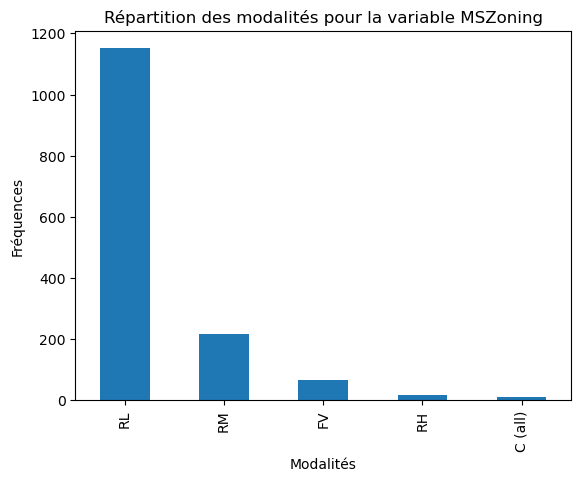

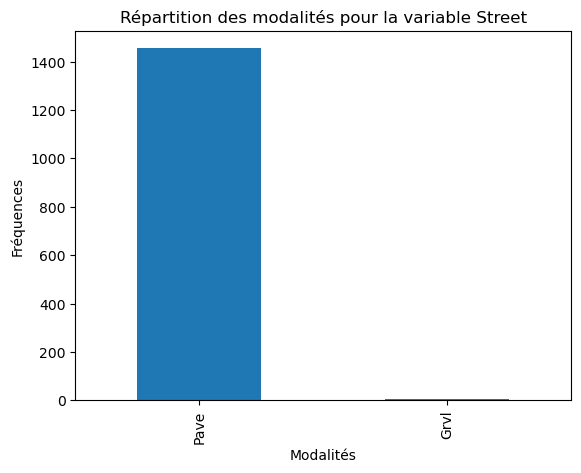

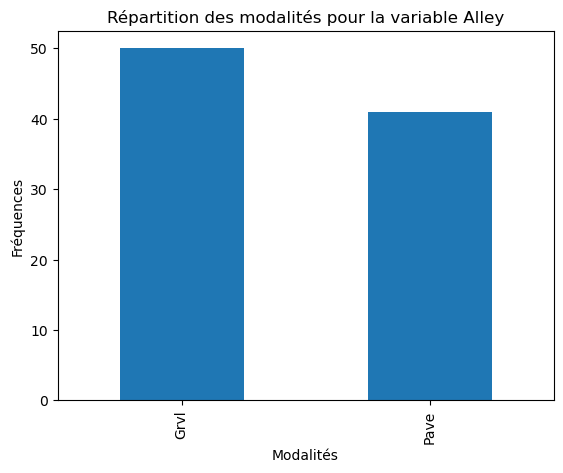

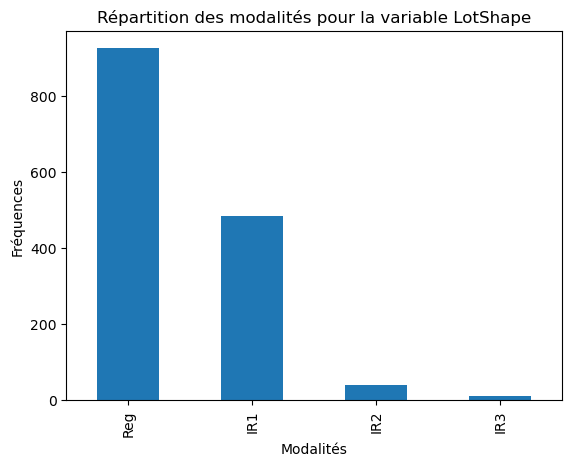

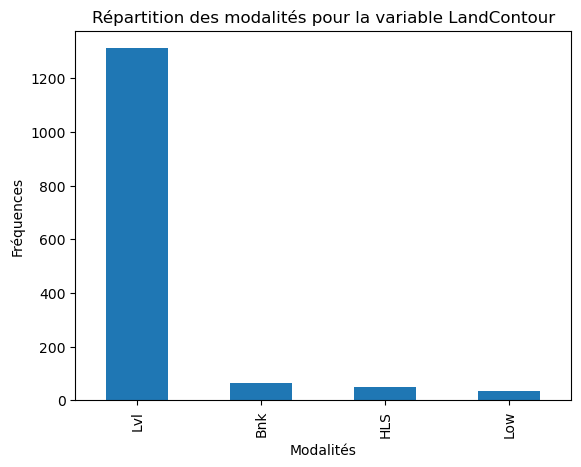

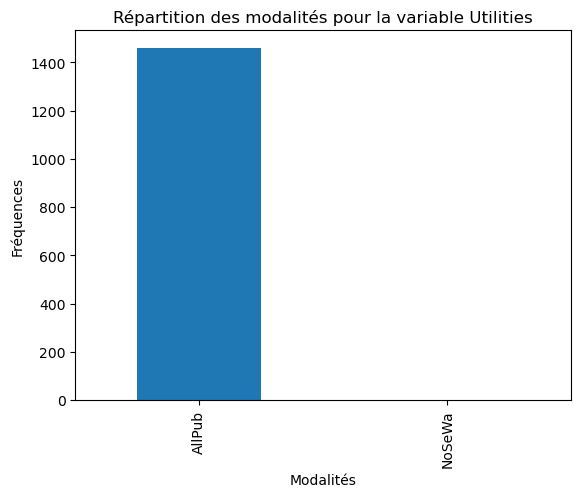

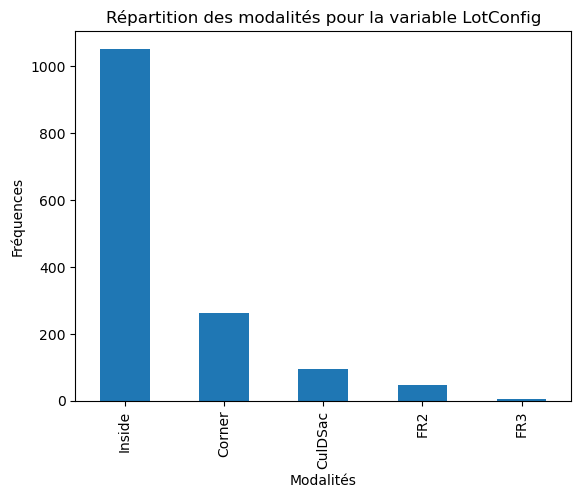

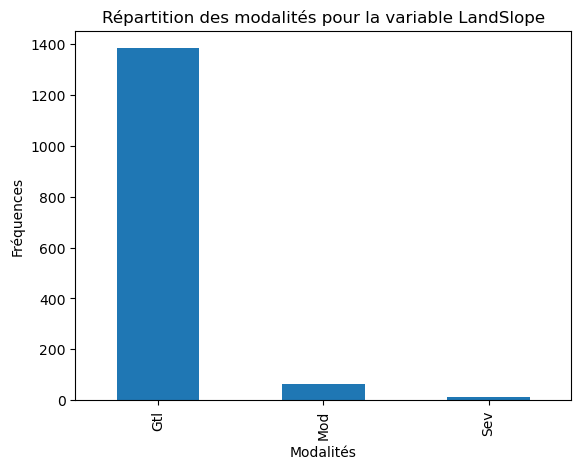

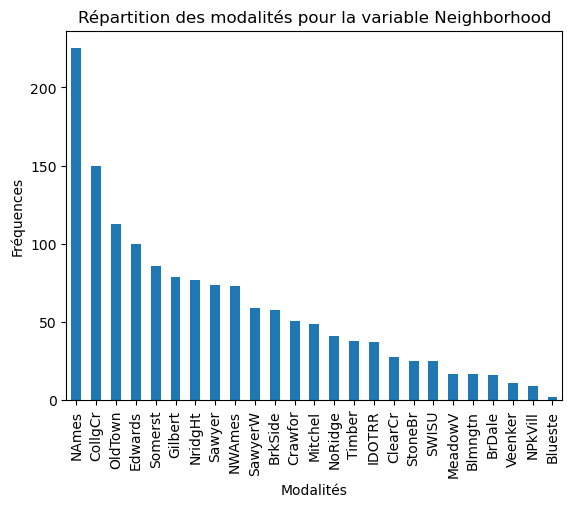

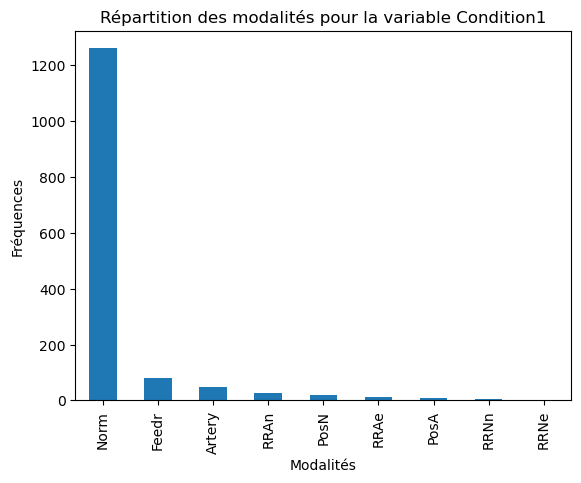

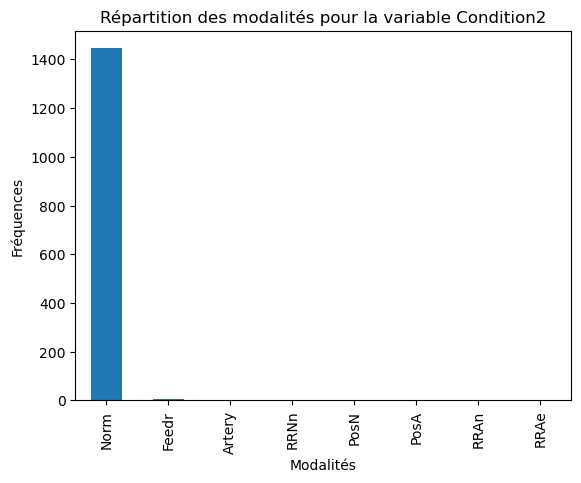

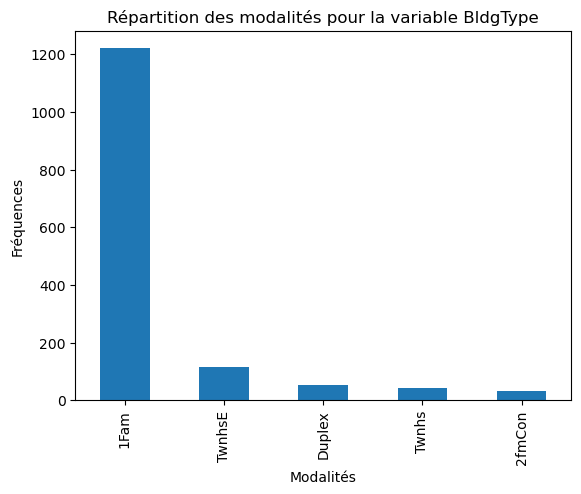

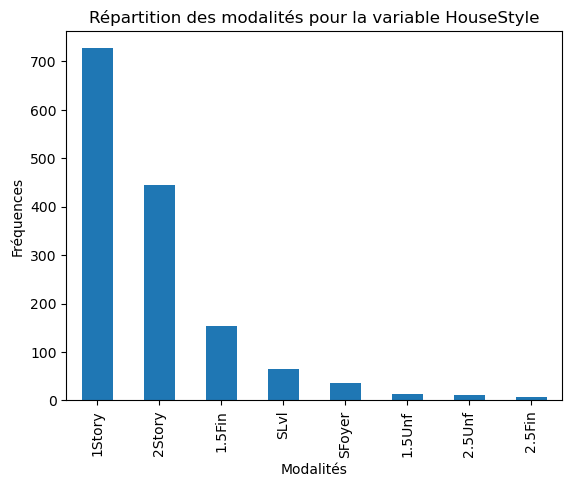

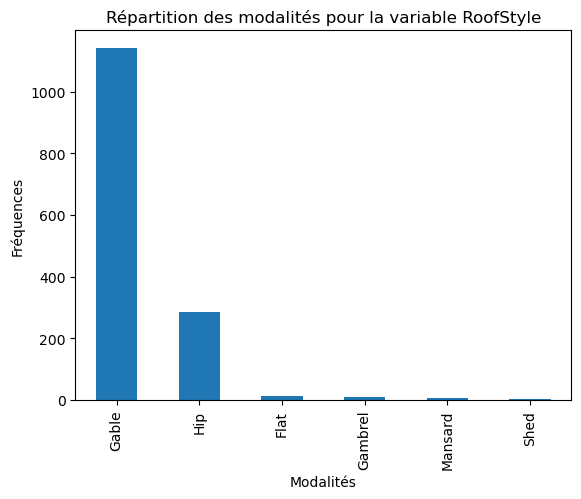

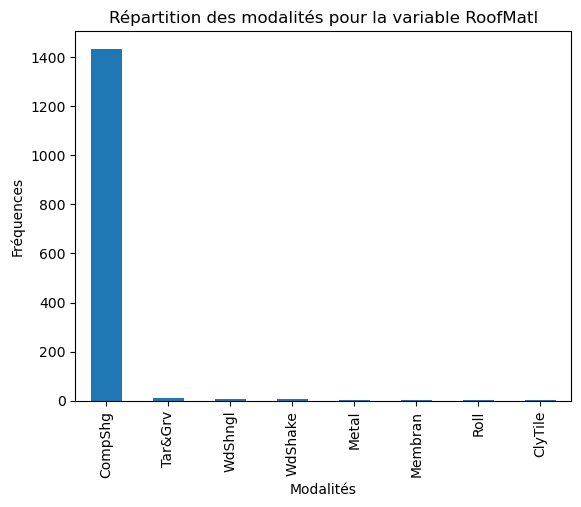

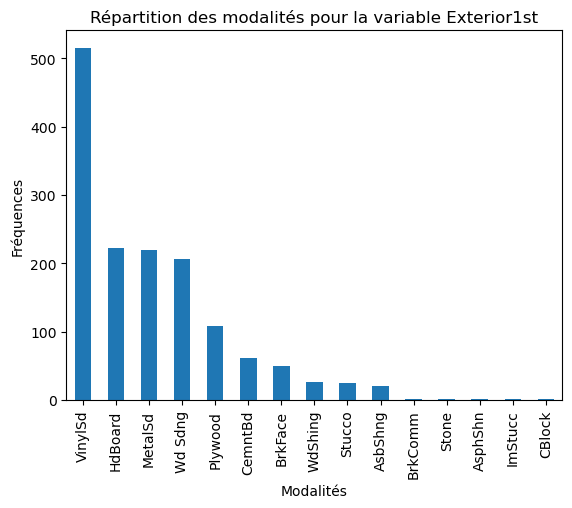

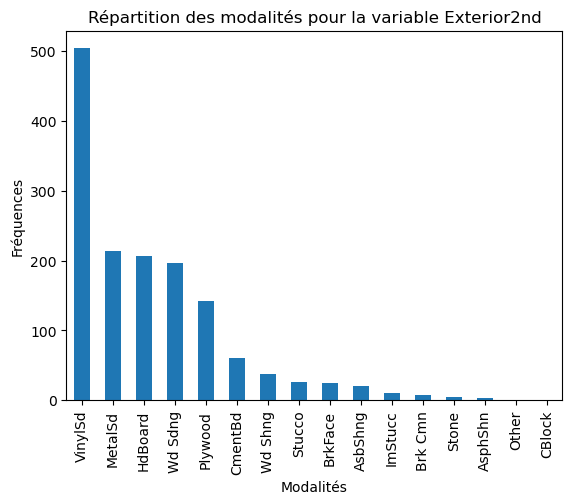

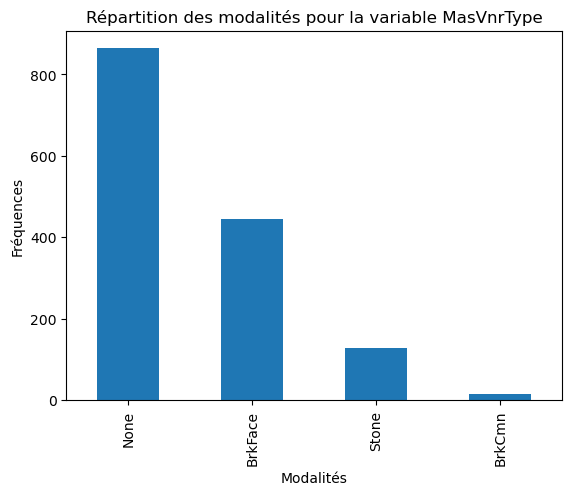

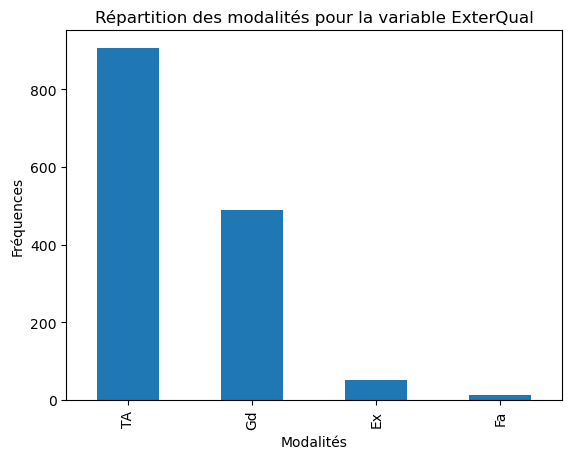

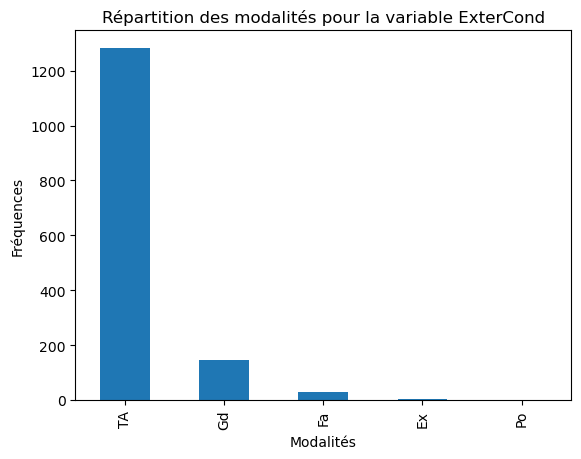

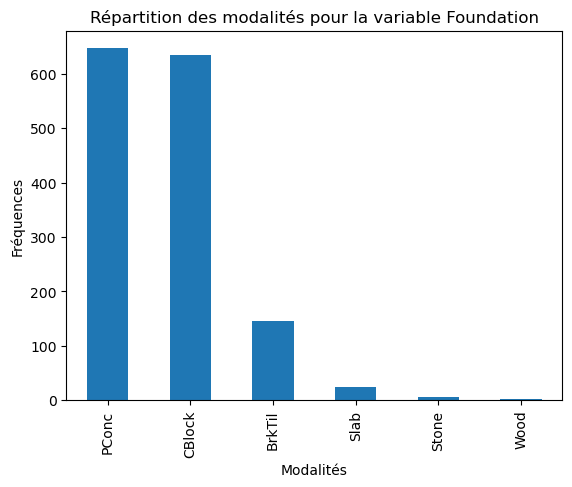

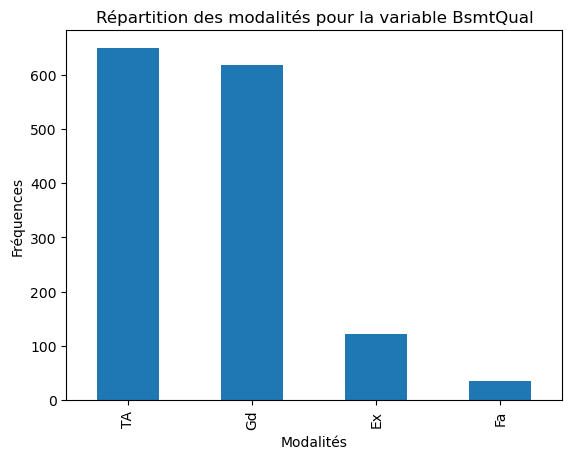

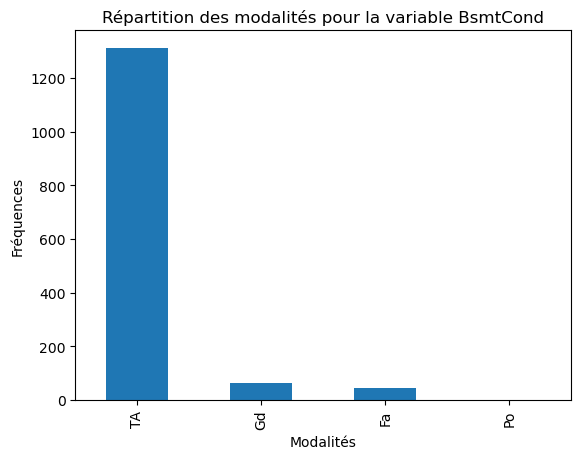

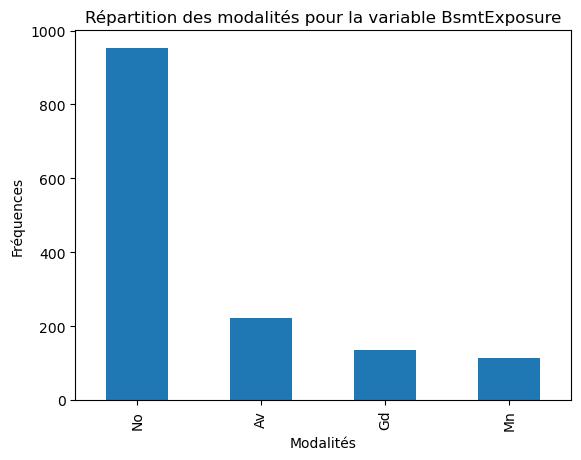

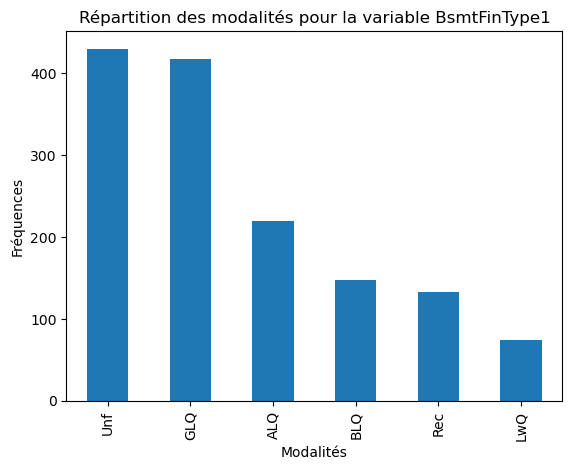

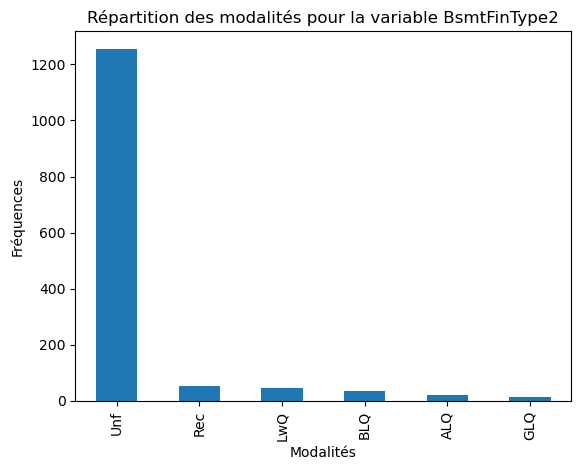

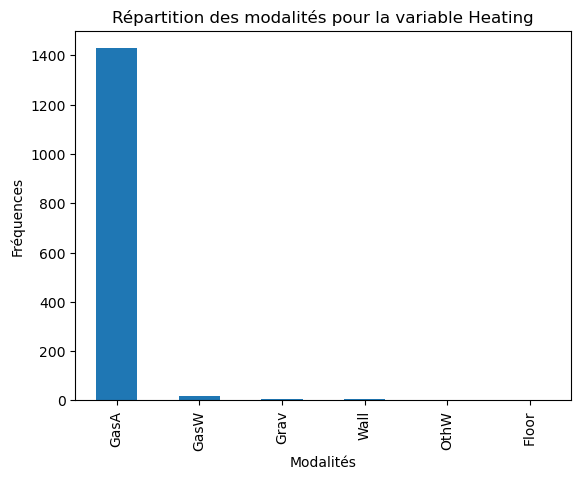

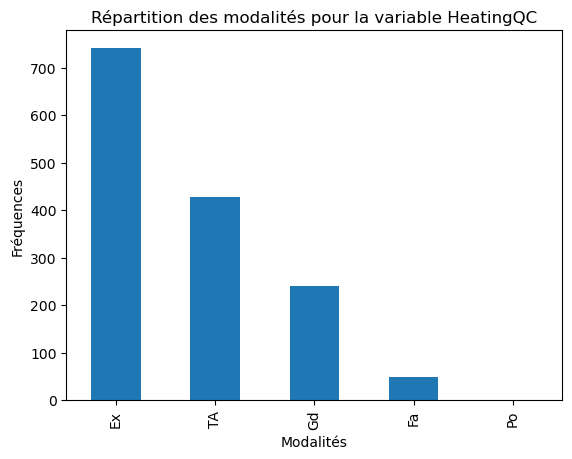

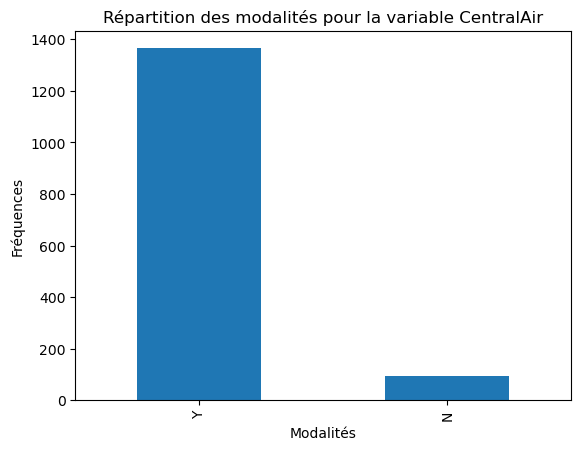

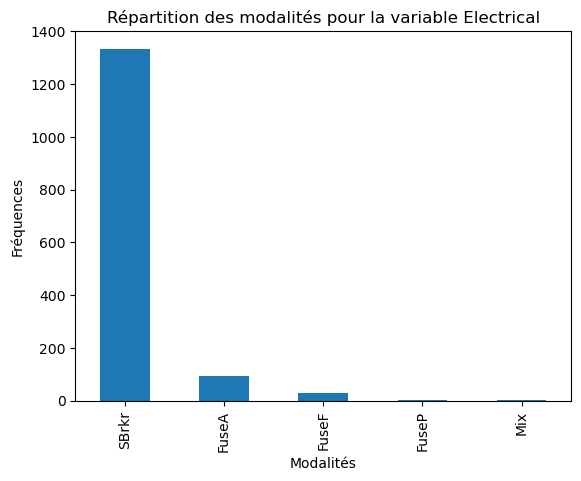

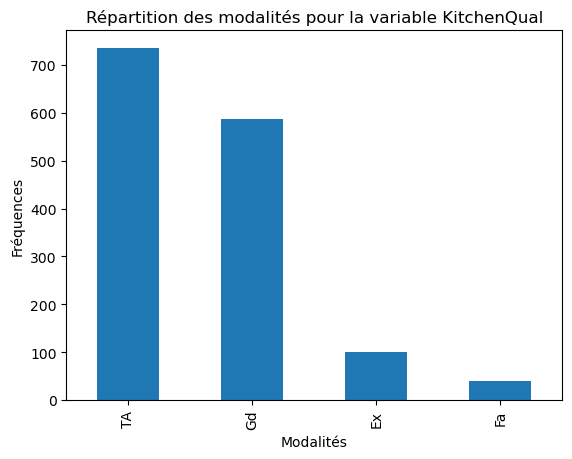

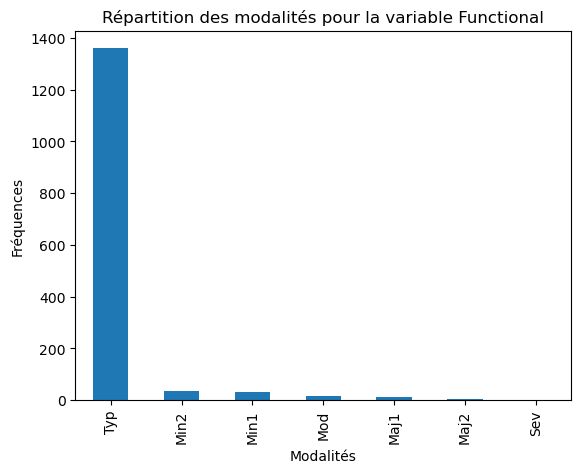

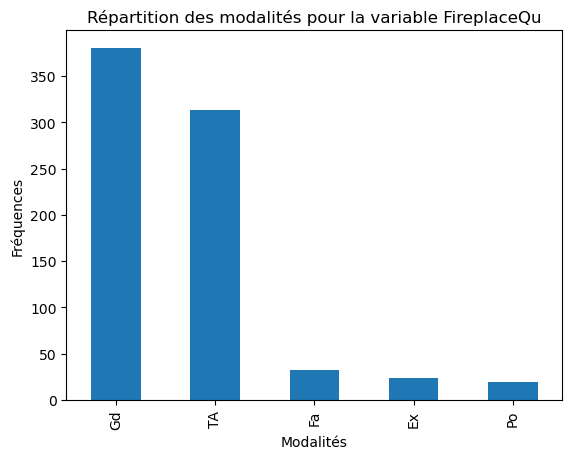

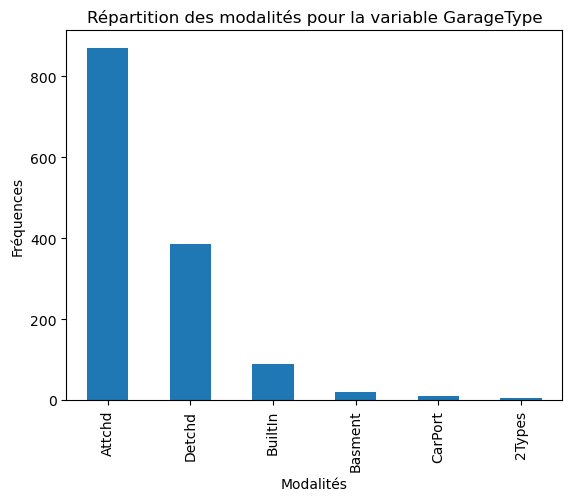

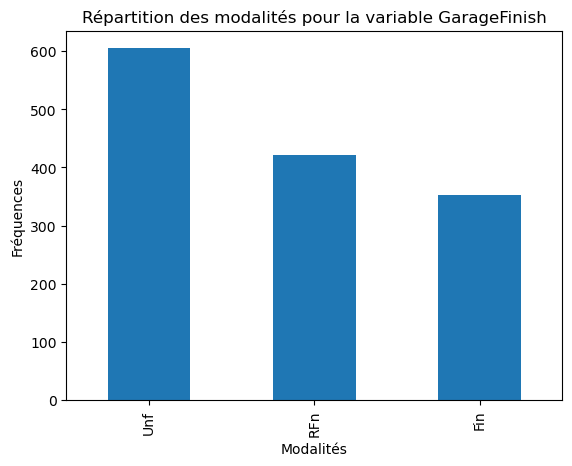

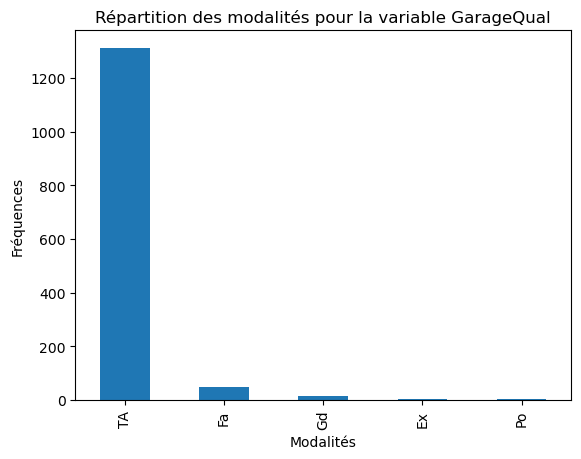

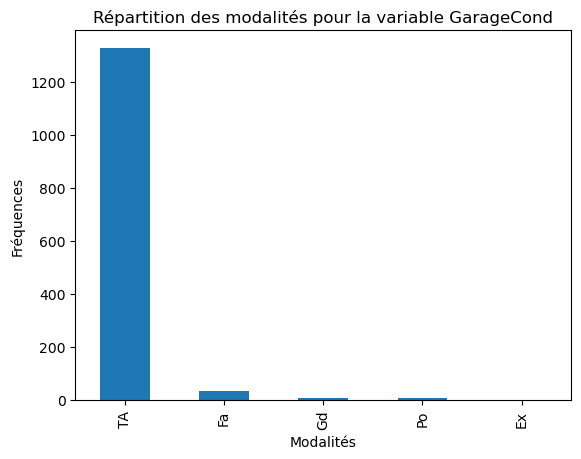

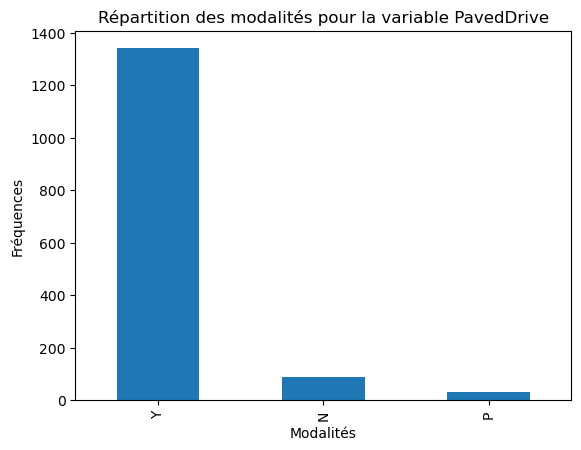

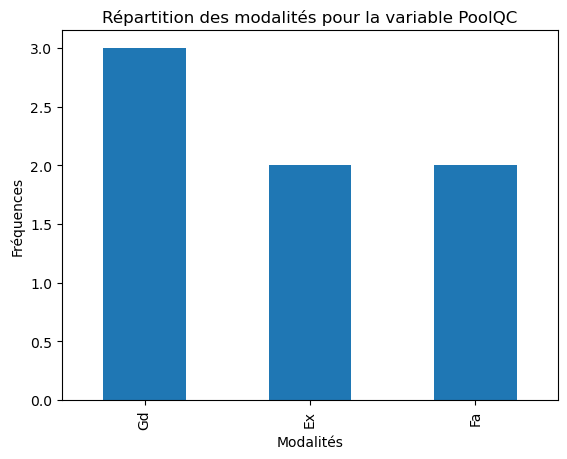

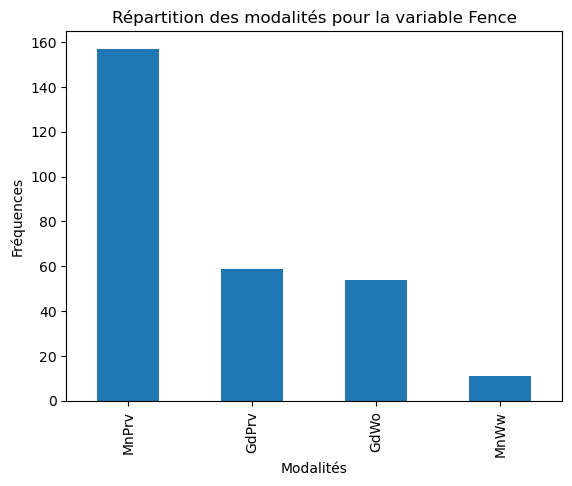

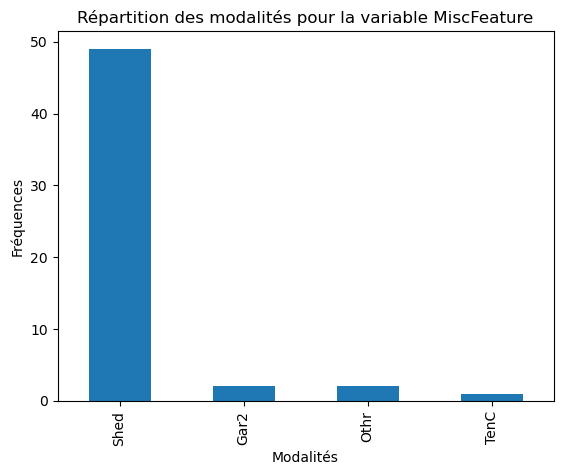

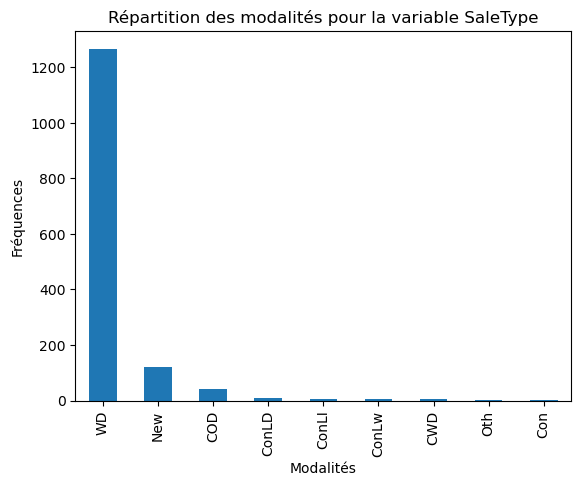

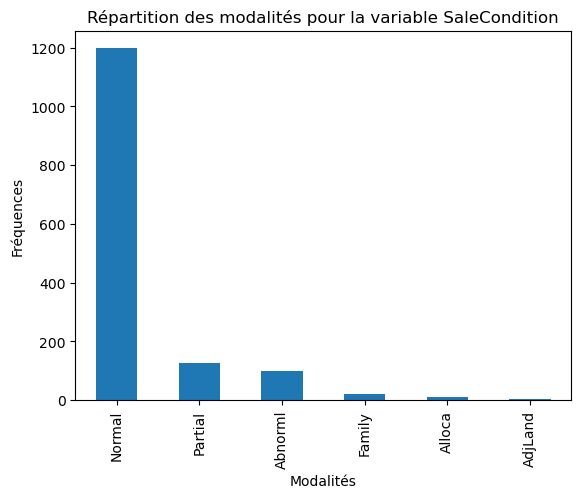

In [9]:
# Sélectionner uniquement les variables catégorielles
categorical_vars = price_train.select_dtypes(include='object')

# Boucle sur chaque variable catégorielle
for var in categorical_vars:
    # Compter les fréquences des modalités de la variable
    frequencies = price_train[var].value_counts()
    
    # Afficher le graphique en utilisant matplotlib
    frequencies.plot(kind='bar')
    plt.xlabel('Modalités')
    plt.ylabel('Fréquences')
    plt.title('Répartition des modalités pour la variable ' + var)
    plt.show()


# Traiter les valeurs manquantes des explicatives catégorielles du train 

On remarque que les valeurs manquantes ne sont pas uniquement des valeurs manquantes. En effet pour certaines variables, la valeur manquantes signifie que la maison ne possede pas ce qui est demandé. 
Par exemple pour LotFrontage = NA => il n'existe pas de ruelle en face de la propriété

on va traiter d'abord les variables catégorielles pour ne pas biaiser les numériques

In [10]:
price_train['Alley'].fillna('none', inplace=True)
price_train['MasVnrType'].fillna('none', inplace=True)
price_train['BsmtQual'].fillna('none', inplace=True)
price_train['BsmtCond'].fillna('none', inplace=True)
price_train['BsmtExposure'].fillna('none', inplace=True)
price_train['BsmtFinType1'].fillna('none', inplace=True)
price_train['BsmtFinType2'].fillna('none', inplace=True)
price_train['FireplaceQu'].fillna('none', inplace=True)
price_train['GarageType'].fillna('none', inplace=True)
price_train['GarageFinish'].fillna('none', inplace=True)
price_train['GarageCond'].fillna('none', inplace=True)
price_train['PoolQC'].fillna('none', inplace=True)
price_train['Fence'].fillna('none', inplace=True)
price_train['MiscFeature'].fillna('none', inplace=True)

In [11]:
#Remplacer par la modalité la plus frequente 
price_train['Electrical'].fillna('SBrkr', inplace=True)

Nous avons 81 variables. Le but de notre etude etant de faire un site internet sur lequel les propriétaires de maison pourront estimer le prix de leur bien, nous n'allons pas leur demander 81 informations. Nous allons dans un premier temps supprimer certaines variables correle de facon logique et dans un second temps supprimer des variables corrélé en fontion du v de cramer

# Traitement des valeurs manquantes et aberrantes des explicatives numériques

ya des variables qui possendent enormement de 0

Selectionner les variables numériques sur lesquelles on va travailler

In [12]:
numerique = price_train.select_dtypes(include=[np.number])
columns_to_drop = ['Id', 'YrSold', 'SalePrice','YearBuilt','YearRemodAdd','GarageYrBlt']
numerique = numerique.drop(columns=columns_to_drop)

In [13]:
def calculate_fences(numerique):
    fences = {}
    for col in numerique.columns:
        Q1 = numerique[col].quantile(0.25)
        Q3 = numerique[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        fences[col] = ['Q1', Q1, 'Q3', Q3, lower_fence, upper_fence]

    return fences

fences = calculate_fences(numerique)
print(fences)

{'MSSubClass': ['Q1', 20.0, 'Q3', 70.0, -55.0, 145.0], 'LotFrontage': ['Q1', 59.0, 'Q3', 80.0, 27.5, 111.5], 'LotArea': ['Q1', 7553.5, 'Q3', 11601.5, 1481.5, 17673.5], 'OverallQual': ['Q1', 5.0, 'Q3', 7.0, 2.0, 10.0], 'OverallCond': ['Q1', 5.0, 'Q3', 6.0, 3.5, 7.5], 'MasVnrArea': ['Q1', 0.0, 'Q3', 166.0, -249.0, 415.0], 'BsmtFinSF1': ['Q1', 0.0, 'Q3', 712.25, -1068.375, 1780.625], 'BsmtFinSF2': ['Q1', 0.0, 'Q3', 0.0, 0.0, 0.0], 'BsmtUnfSF': ['Q1', 223.0, 'Q3', 808.0, -654.5, 1685.5], 'TotalBsmtSF': ['Q1', 795.75, 'Q3', 1298.25, 42.0, 2052.0], '1stFlrSF': ['Q1', 882.0, 'Q3', 1391.25, 118.125, 2155.125], '2ndFlrSF': ['Q1', 0.0, 'Q3', 728.0, -1092.0, 1820.0], 'LowQualFinSF': ['Q1', 0.0, 'Q3', 0.0, 0.0, 0.0], 'GrLivArea': ['Q1', 1129.5, 'Q3', 1776.75, 158.625, 2747.625], 'BsmtFullBath': ['Q1', 0.0, 'Q3', 1.0, -1.5, 2.5], 'BsmtHalfBath': ['Q1', 0.0, 'Q3', 0.0, 0.0, 0.0], 'FullBath': ['Q1', 1.0, 'Q3', 2.0, -0.5, 3.5], 'HalfBath': ['Q1', 0.0, 'Q3', 1.0, -1.5, 2.5], 'BedroomAbvGr': ['Q1', 2.0,

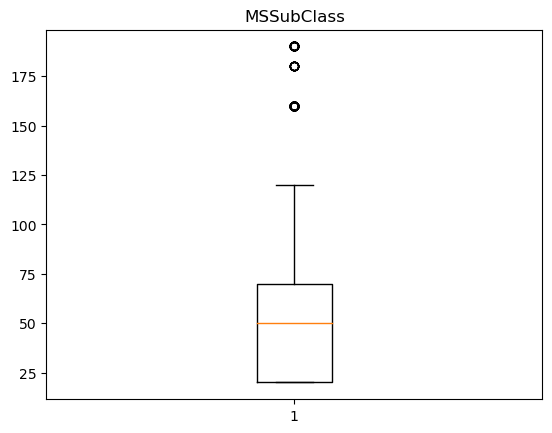

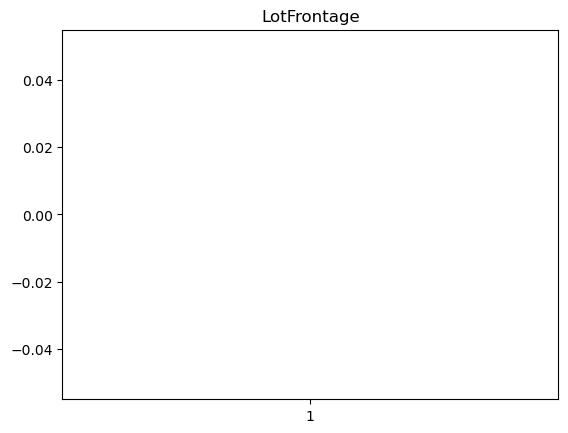

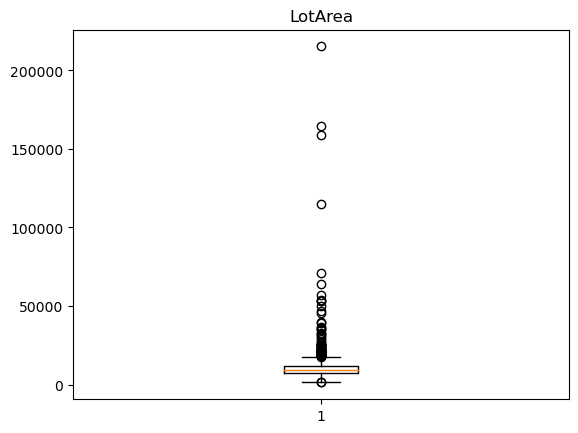

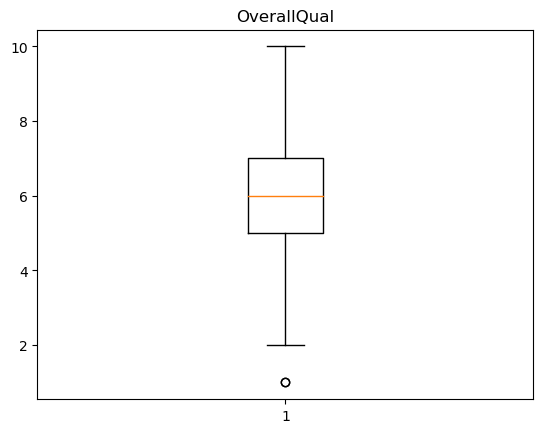

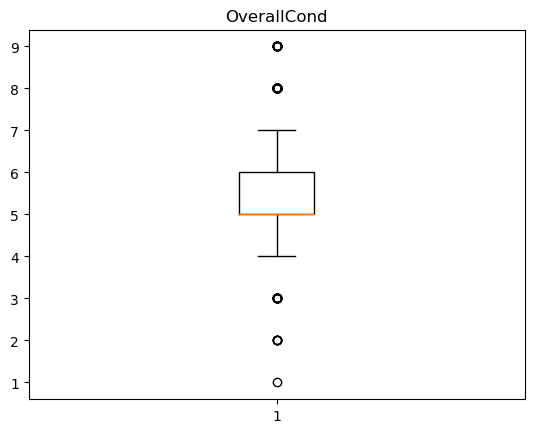

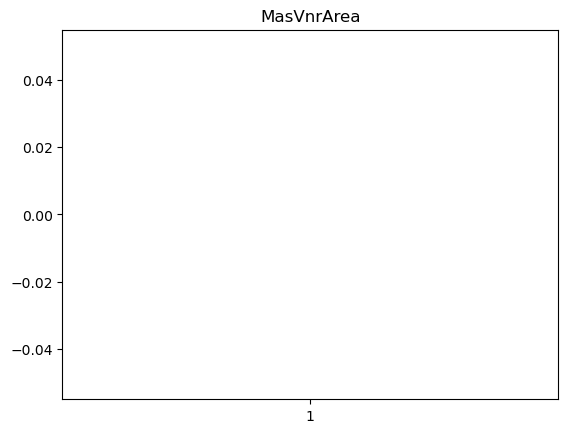

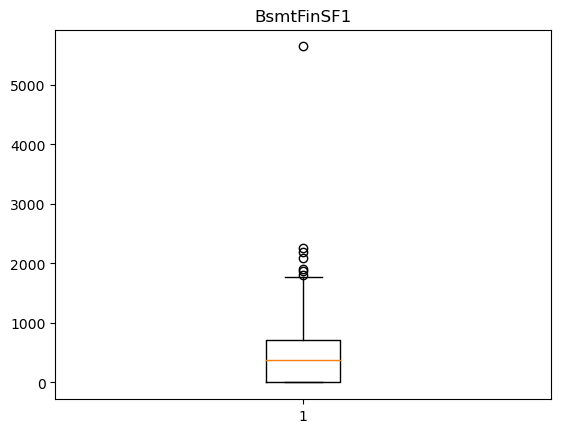

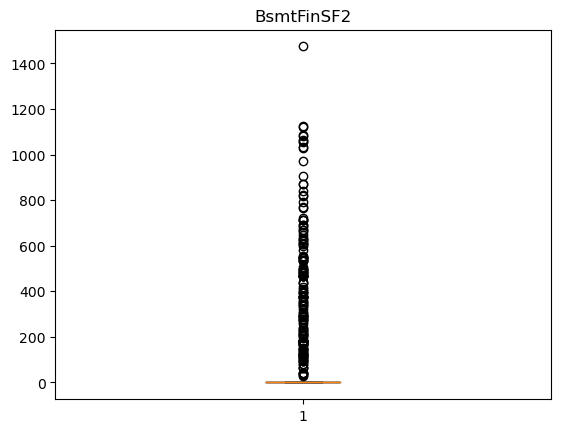

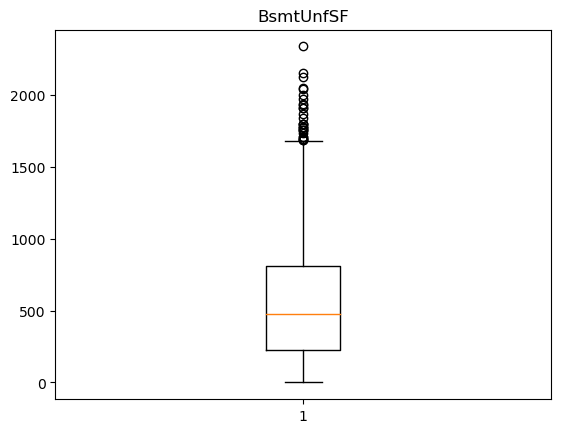

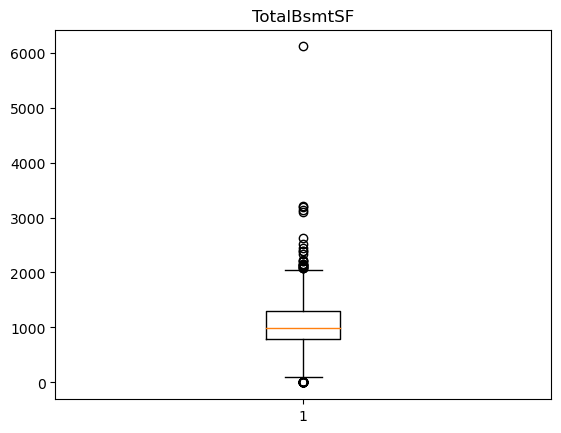

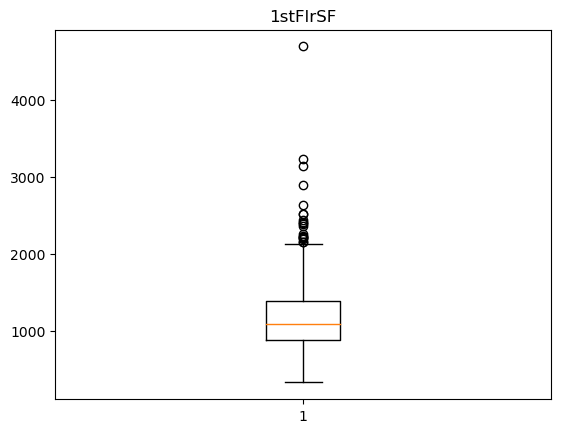

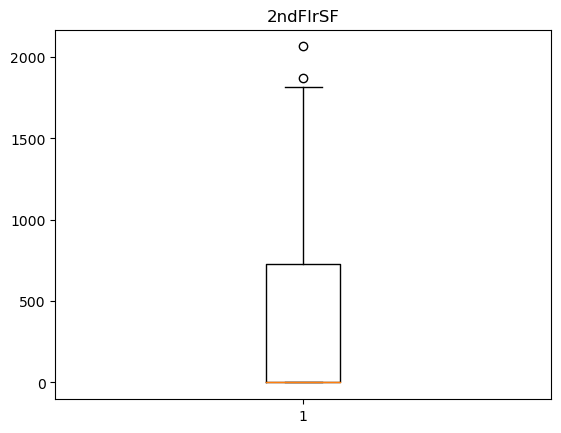

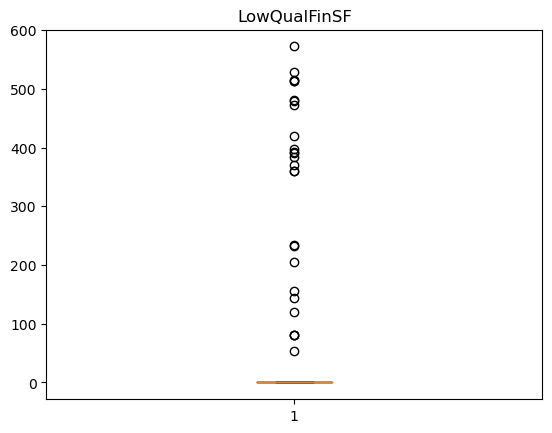

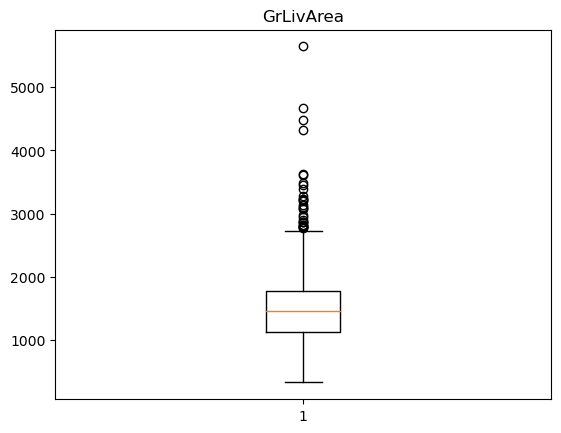

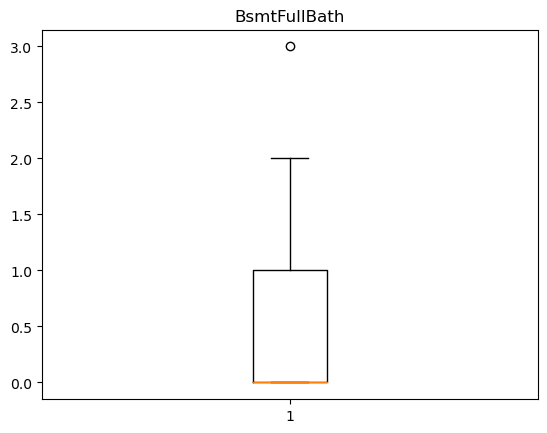

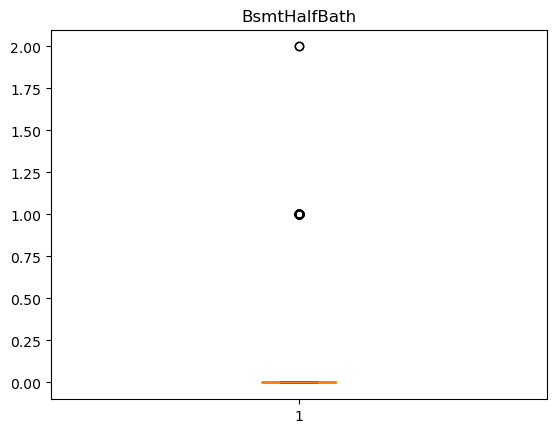

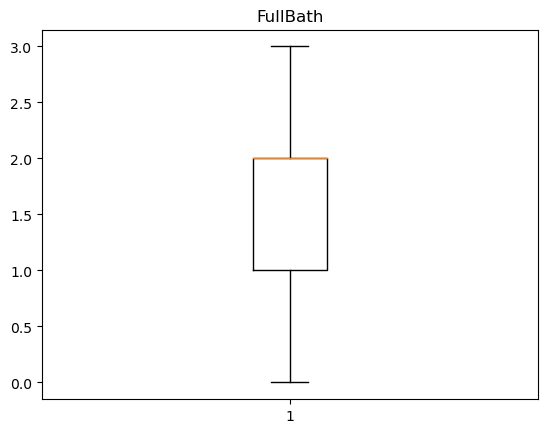

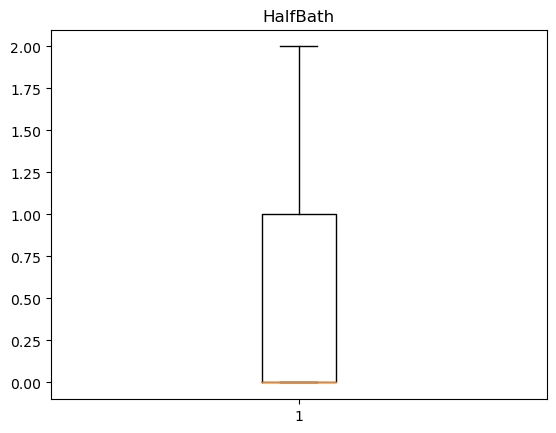

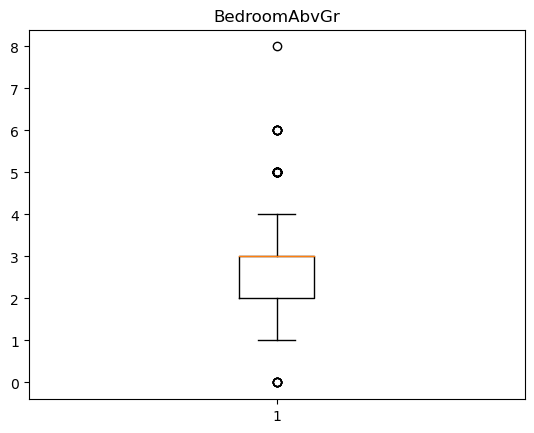

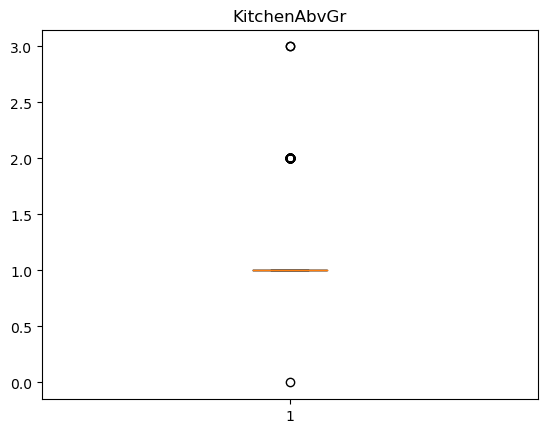

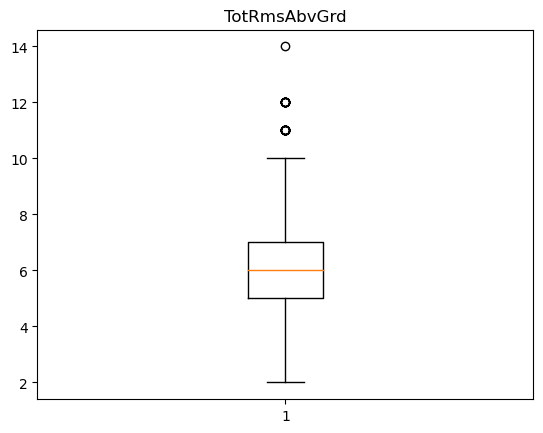

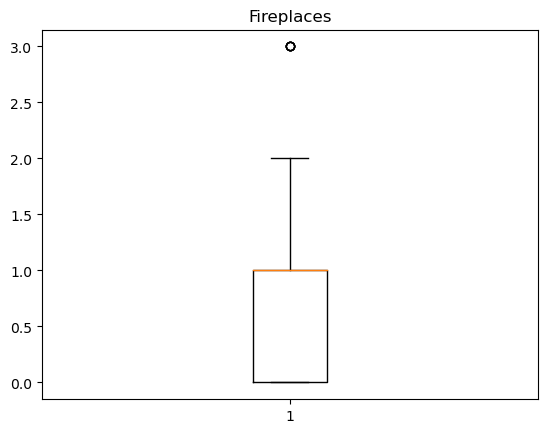

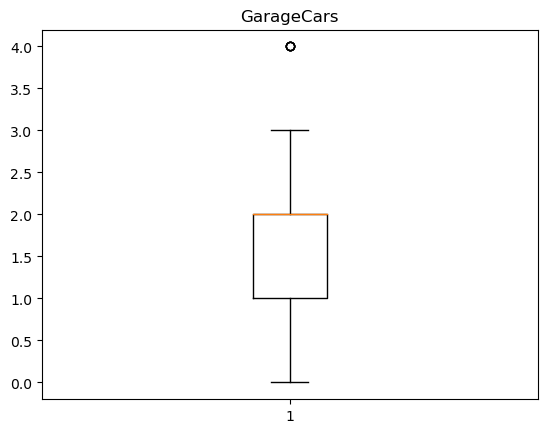

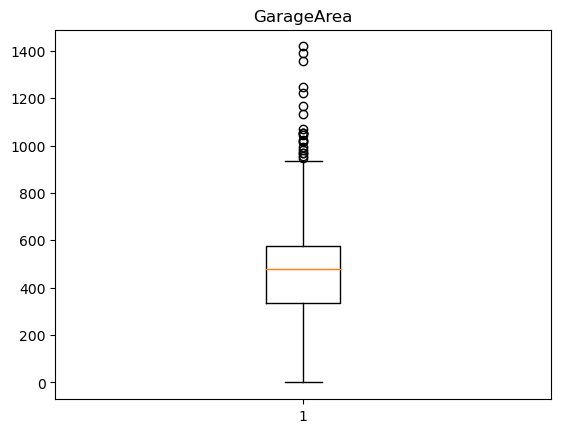

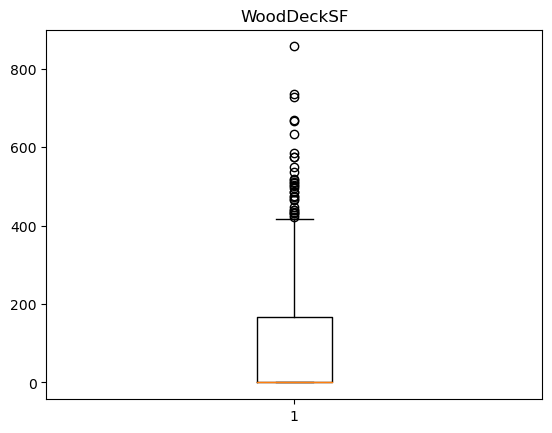

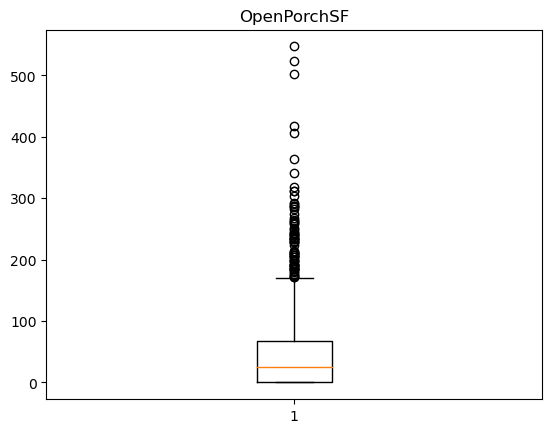

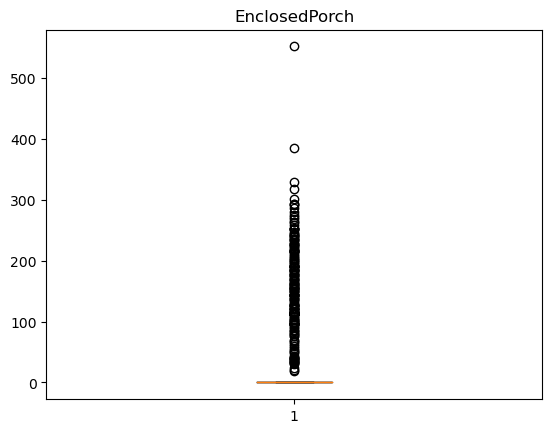

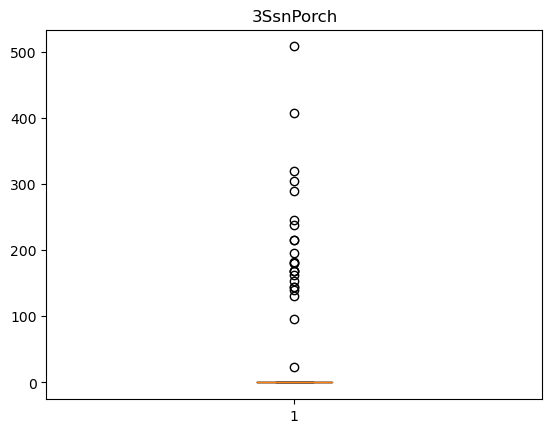

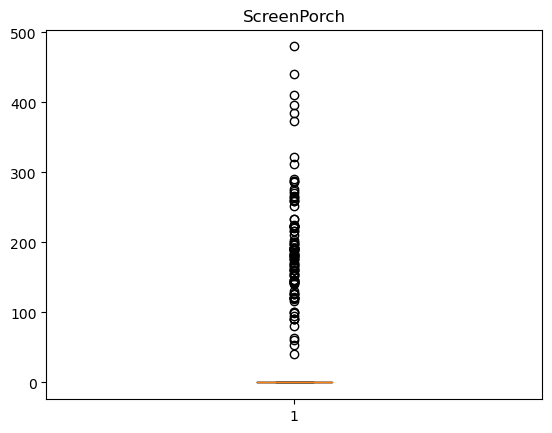

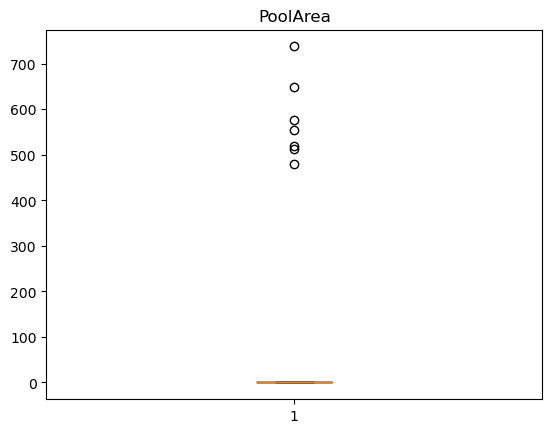

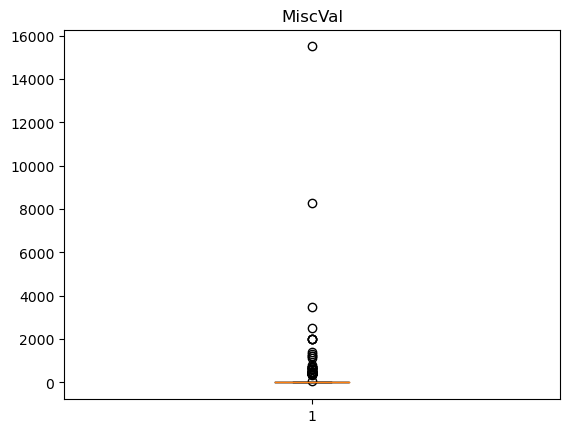

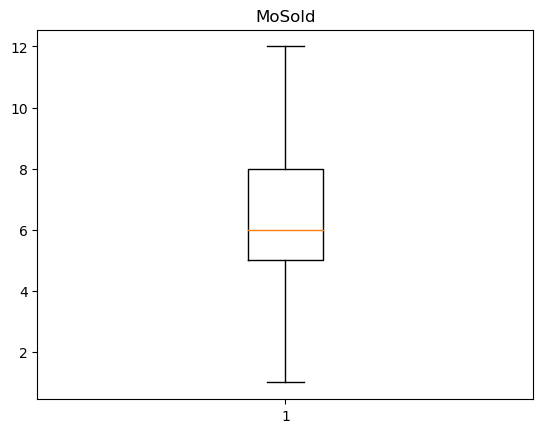

In [14]:
for col in numerique.columns:
    plt.boxplot(numerique[col])
    plt.title(col)
    plt.show()

## Statistiques descriptives bivariées

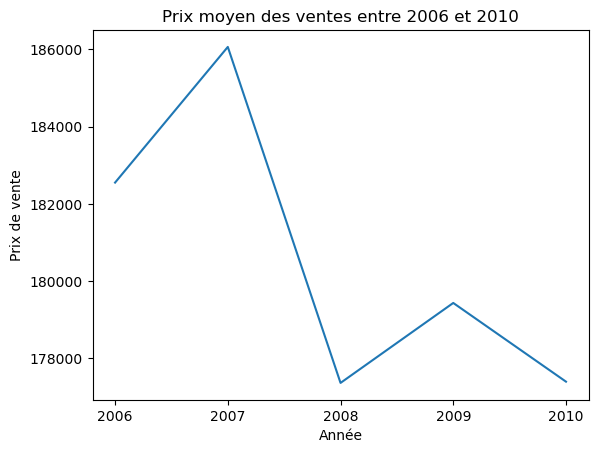

In [15]:
import matplotlib.pyplot as plt

x_axis = ['2006','2007','2008','2009','2010']
y_axis = price_train.groupby(price_train.YrSold)['SalePrice'].mean()

plt.plot(x_axis, y_axis)
plt.title('Prix moyen des ventes entre 2006 et 2010')
plt.xlabel('Année')
plt.ylabel('Prix de vente')
plt.show()

 Le prix des maisons chute en 2008 : c'est la crise des subprimes. On peut donc déduire que l'année de vente va fortement définir le prix des maisons. 

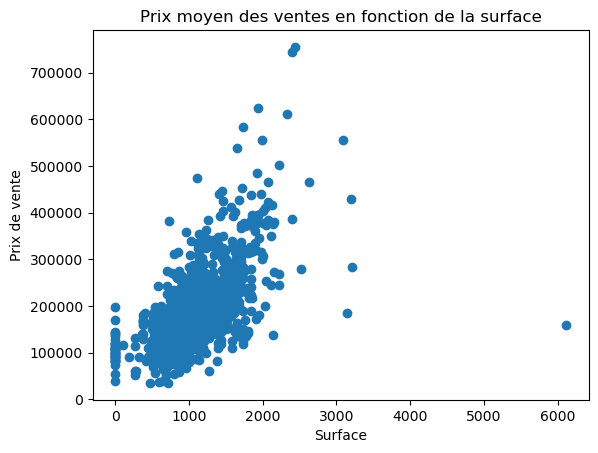

In [64]:
x_axis = base['TotalBsmtSF']
y_axis = base['SalePrice']

plt.scatter(x_axis, y_axis)
plt.title('Prix moyen des ventes en fonction de la surface')
plt.xlabel('Surface')
plt.ylabel('Prix de vente')
plt.show()

Corrélation positive entre la surface et le prix de vente. 

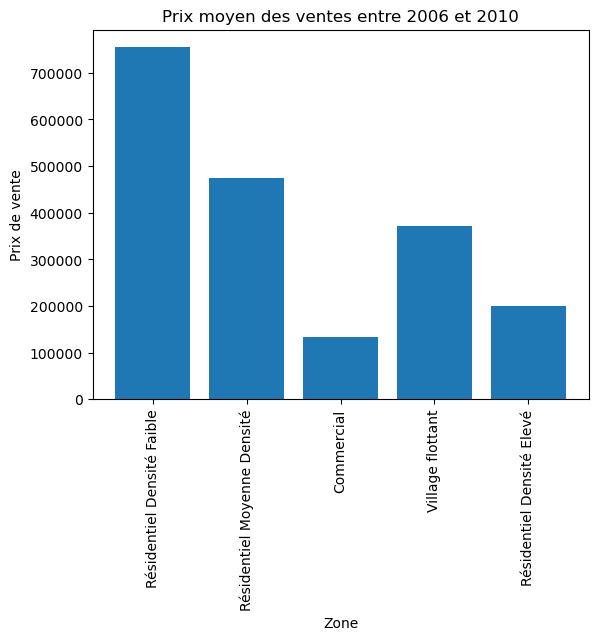

In [81]:
import matplotlib.pyplot as plt
bars = ('Résidentiel Densité Faible', 'Résidentiel Moyenne Densité', 'Commercial', 'Village flottant', 'Résidentiel Densité Elevé')
y_pos = np.arange(len(bars))

x_axis = base['MSZoning']
y_axis = base['SalePrice']

plt.bar(x_axis, y_axis)
plt.title('Prix moyen des ventes entre 2006 et 2010')
plt.xlabel('Zone')
plt.ylabel('Prix de vente')
plt.xticks(y_pos, bars, rotation=90)
plt.show()

#['Résidentiel Densité Faible', 'Résidentiel Moyenne Densité', 'Commercial', 'Village flottant', 'Résidentiel Densité Elevé']

## Option 1 : Laisser les variables en numérique
## Option 2 : Discrediter les variables (mettre en catégorie)

In [43]:
# Création de la nouvelle variable MiscValCategorie
base = price_train
base['MiscValCategorie'] = 'Différent de 0'
base.loc[base['MiscVal'] == 0, 'MiscValCategorie'] = 'Égal à 0'

# Vérification des résultats
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...        none       0      2   2008       WD   
1         Lvl    AllPub  ...        none       0      5   2007       WD   
2         Lvl    AllPub  ...        none       0      9   2008       WD   
3         Lvl    AllPub  ...        none       0      2   2006       WD   
4         Lvl    AllPub  ...        none       0     12   2008       WD   

  SaleCondition SalePrice  MiscValCategorie  SDB  BsmtSF  
0        Normal    208500          Égal à 0  

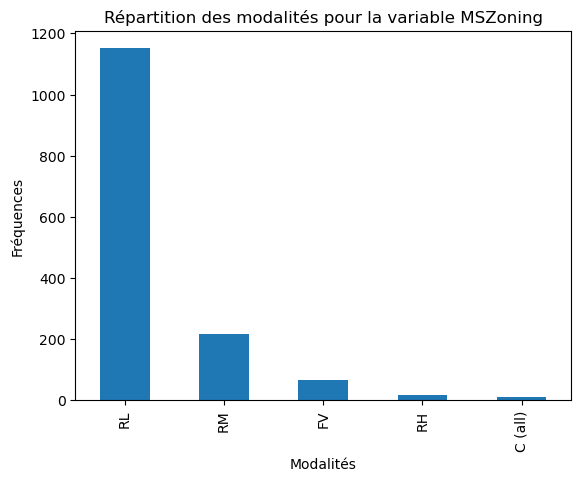

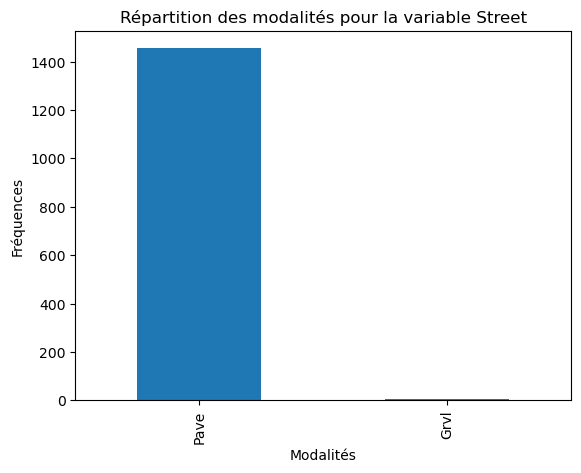

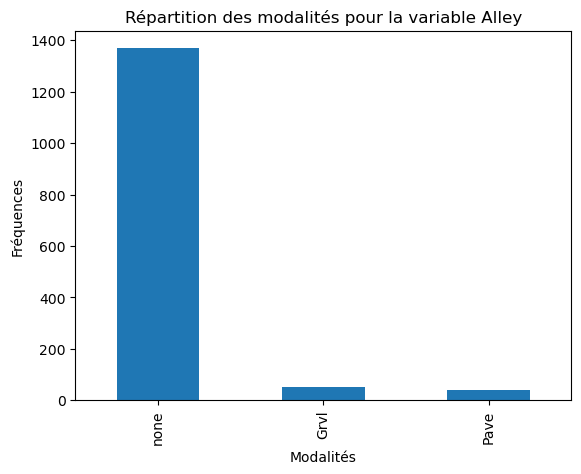

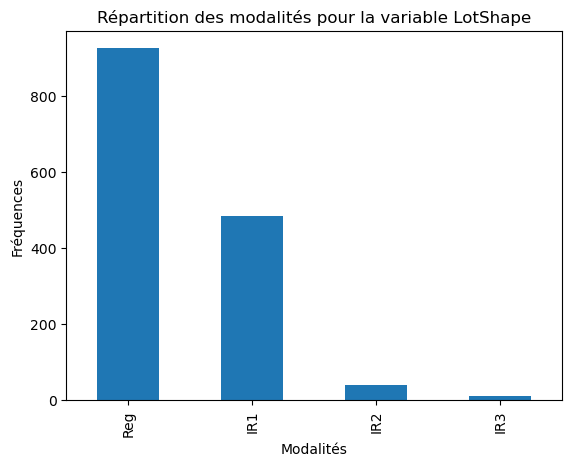

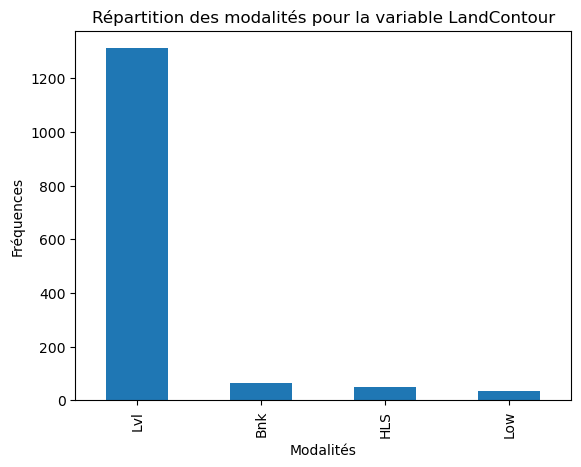

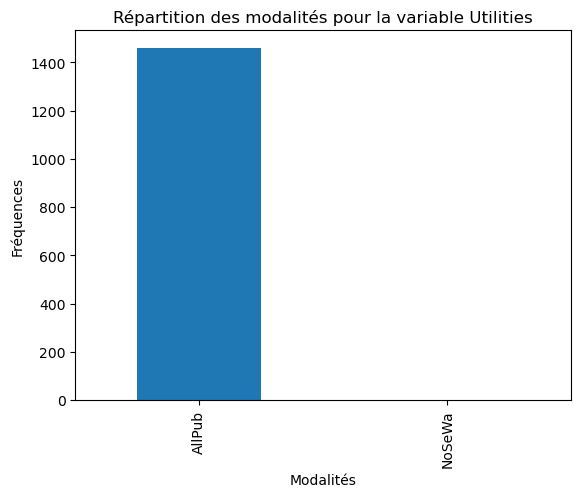

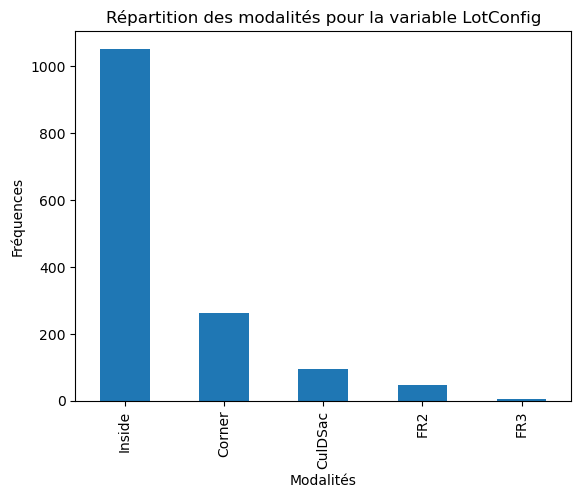

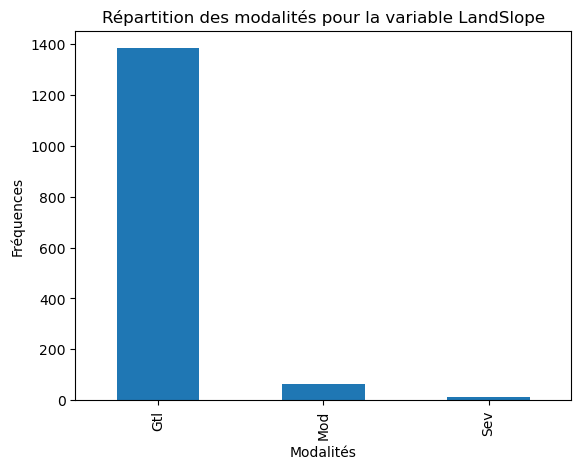

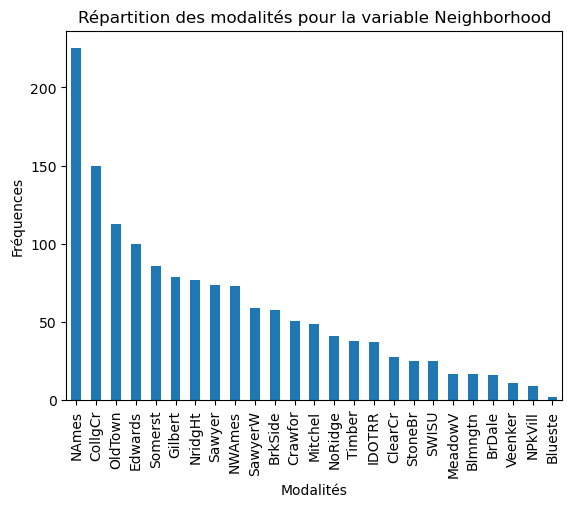

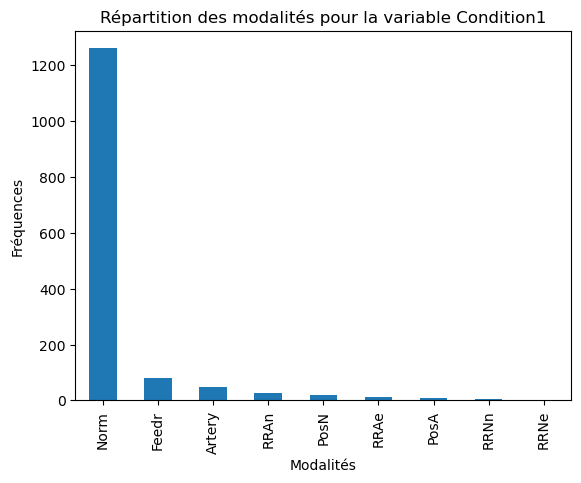

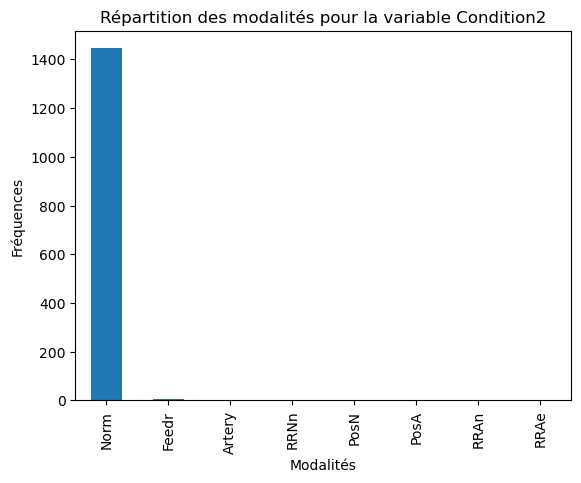

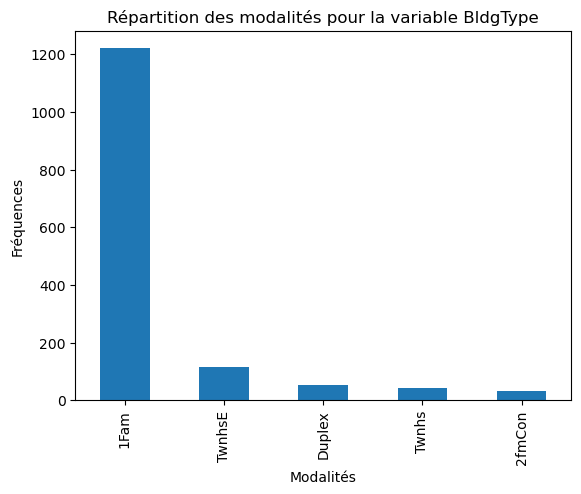

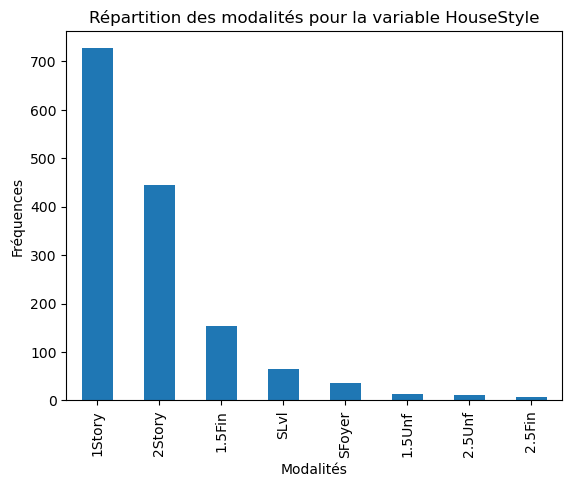

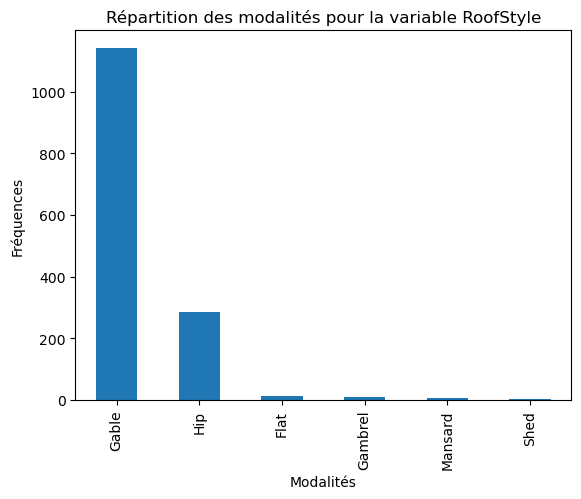

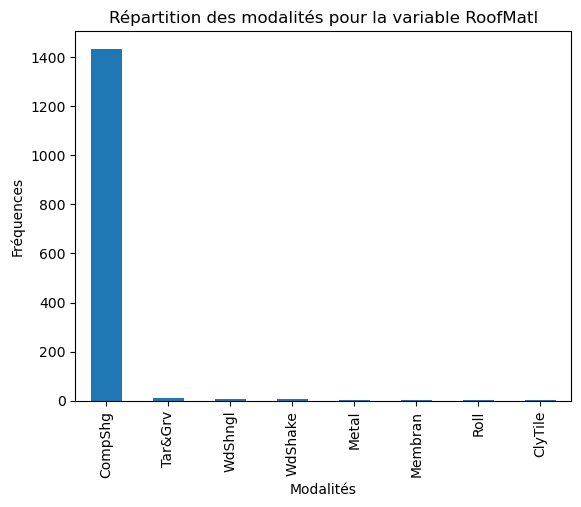

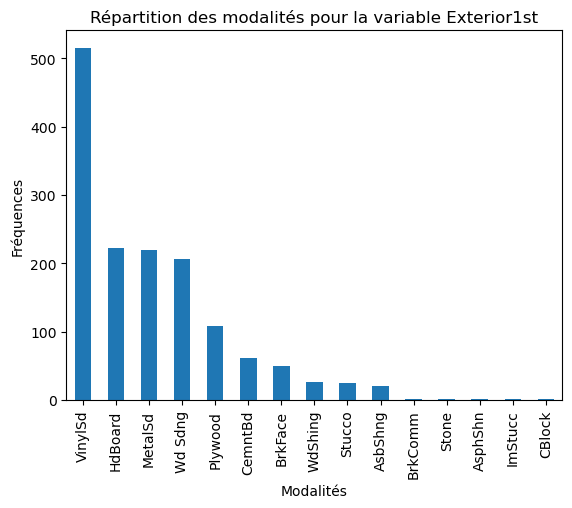

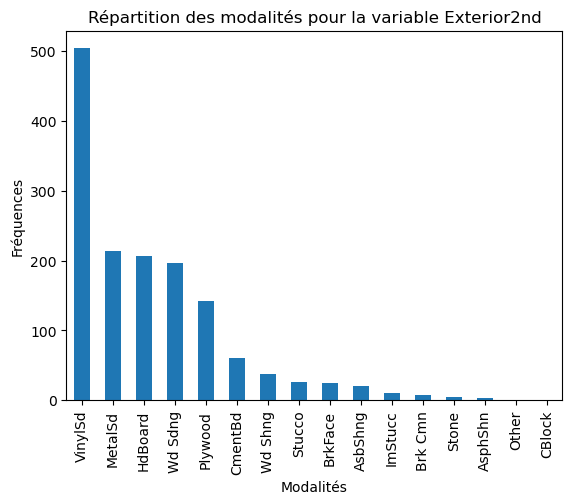

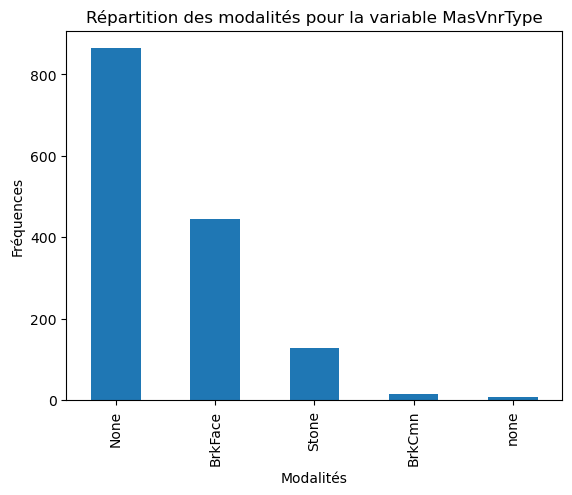

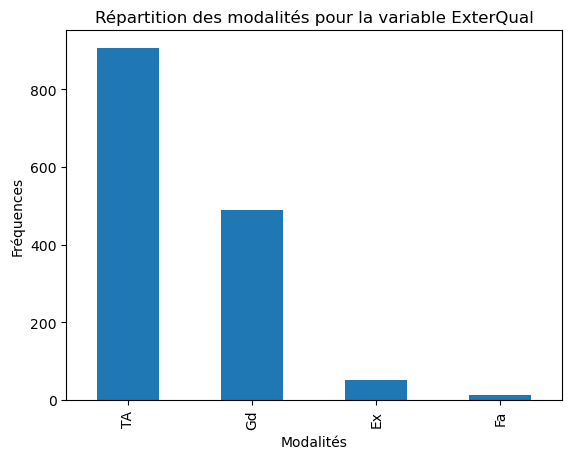

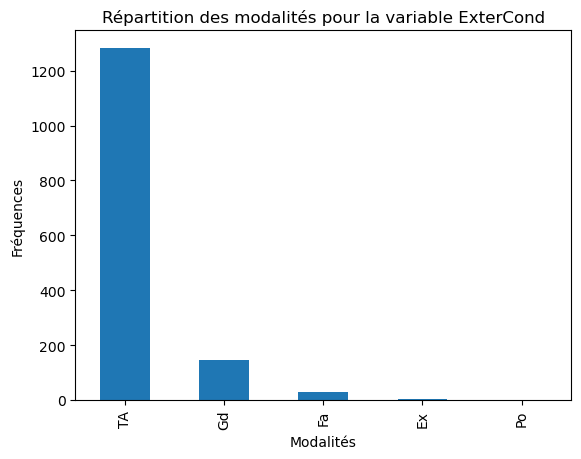

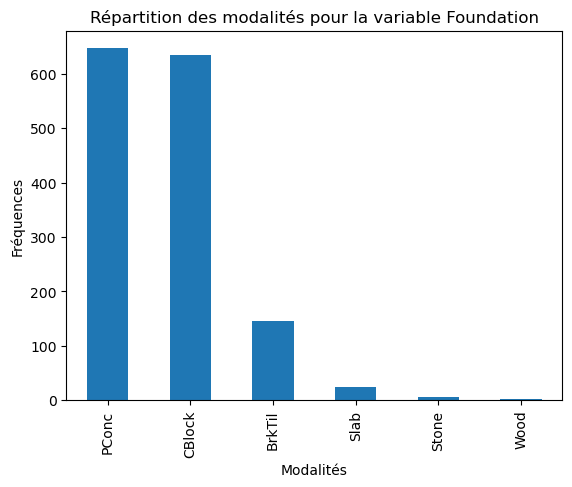

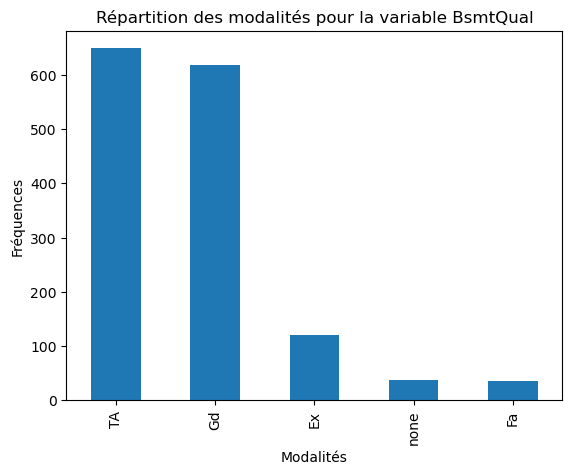

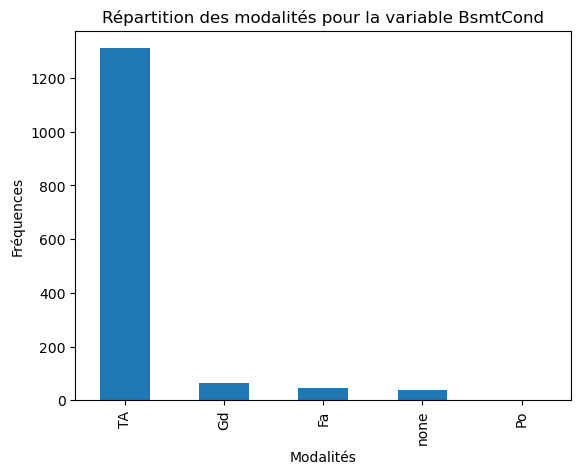

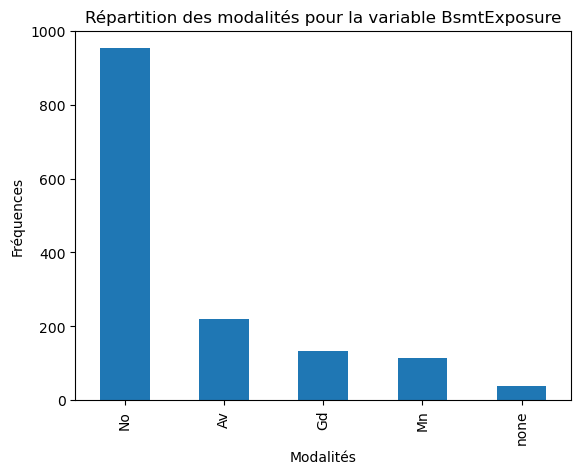

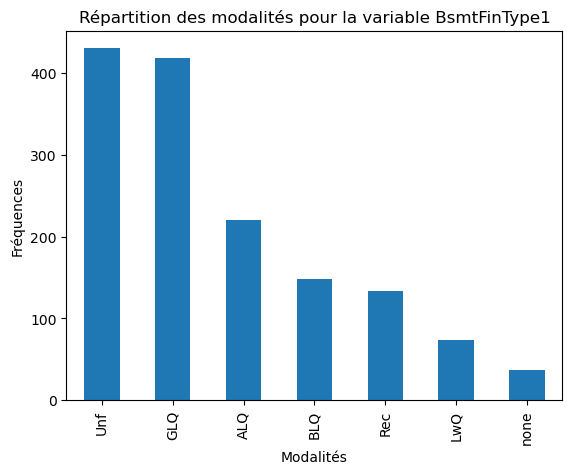

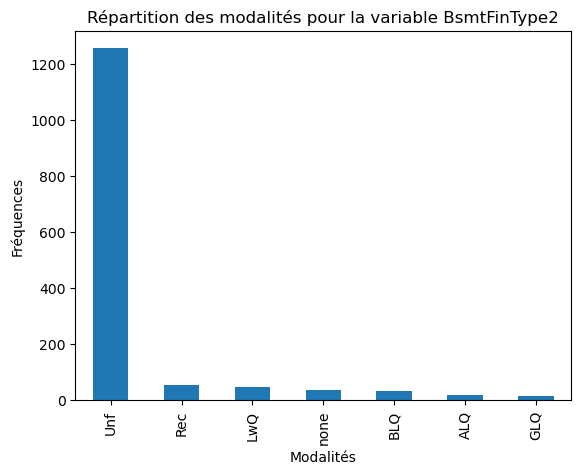

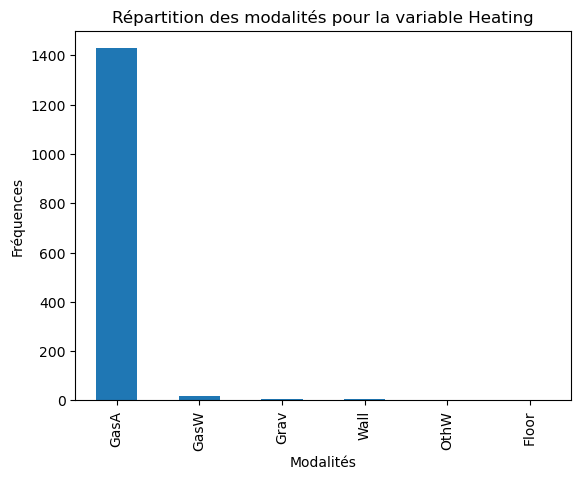

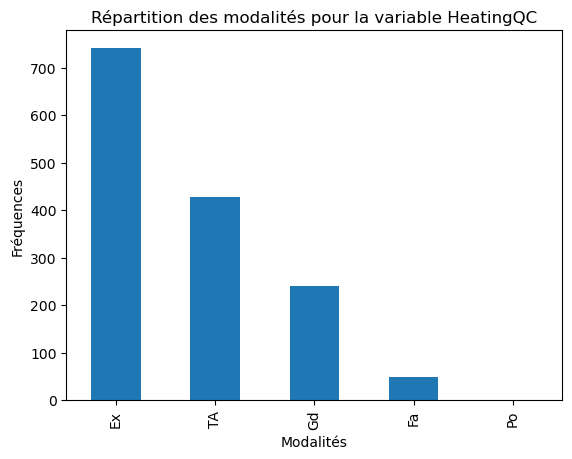

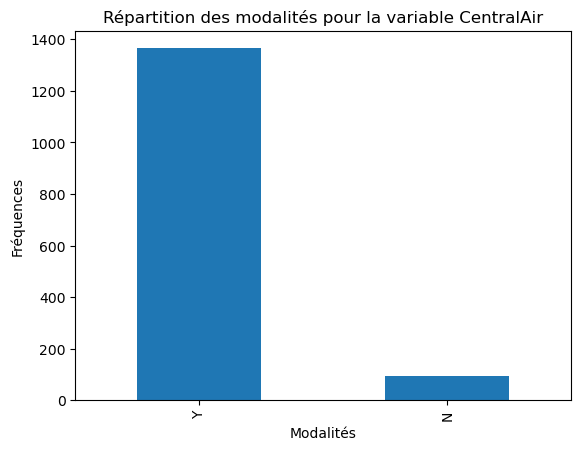

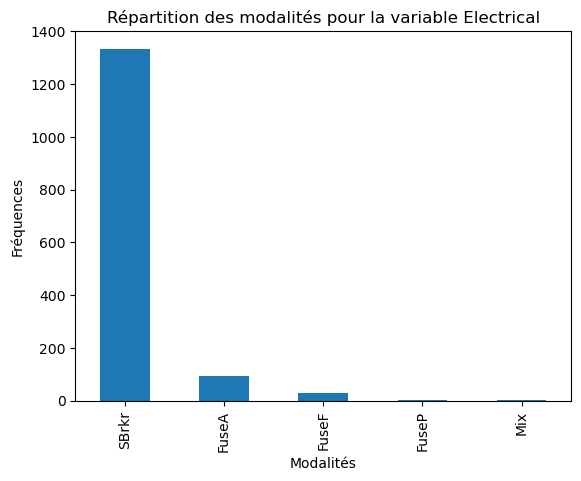

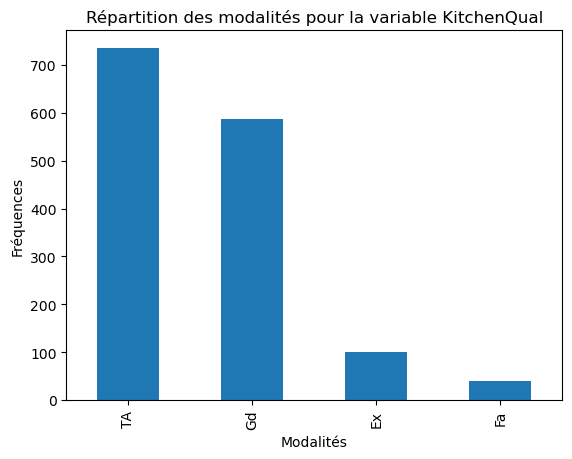

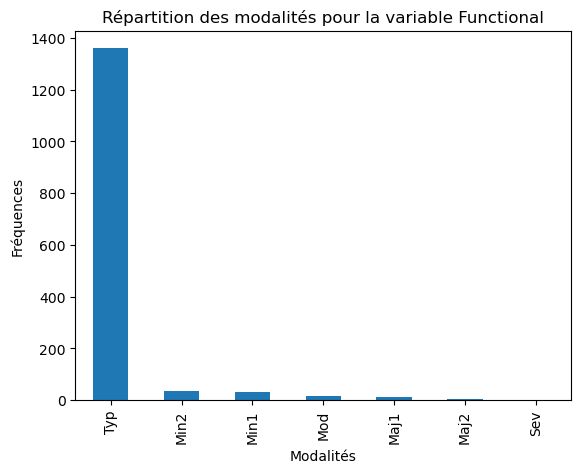

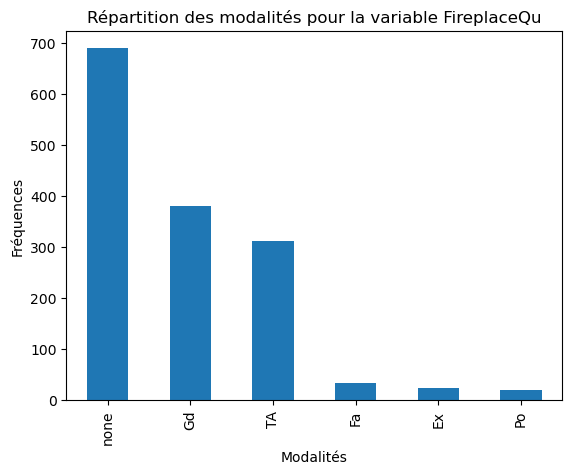

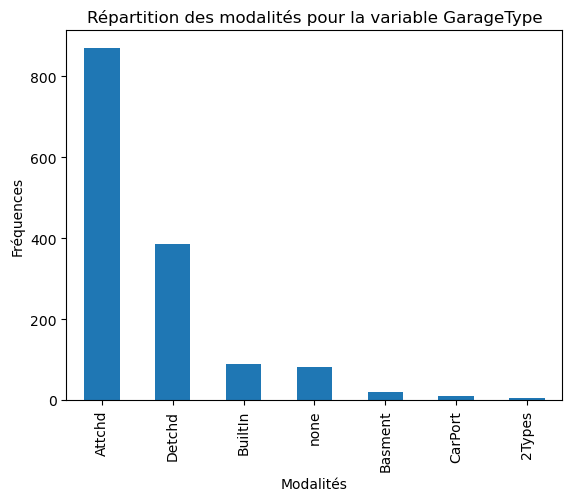

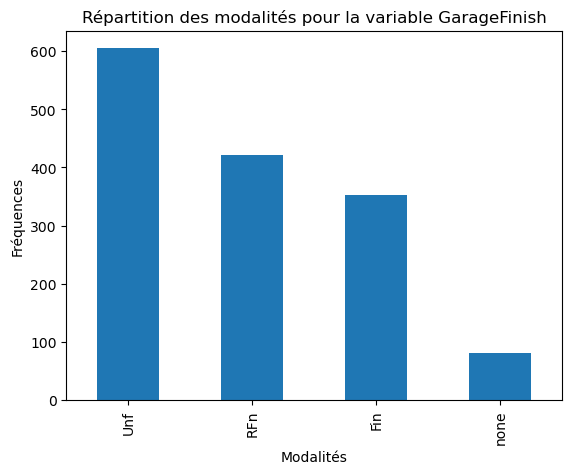

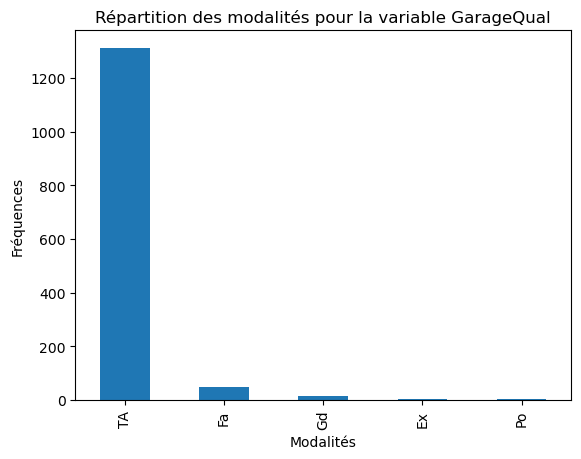

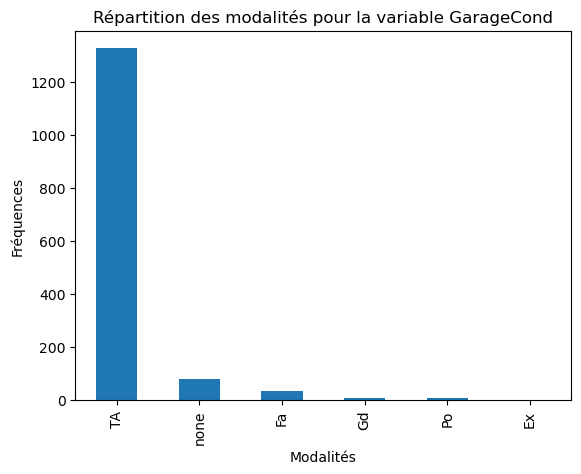

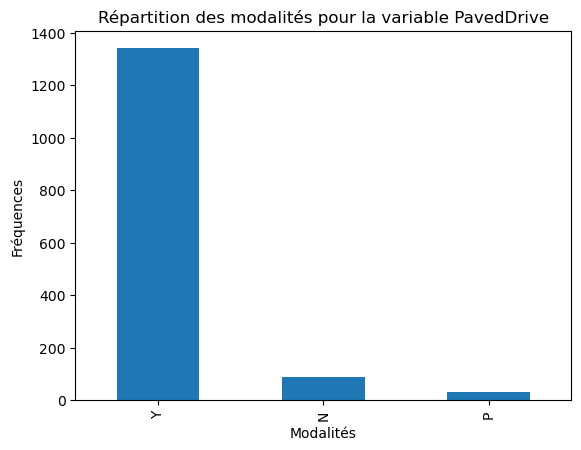

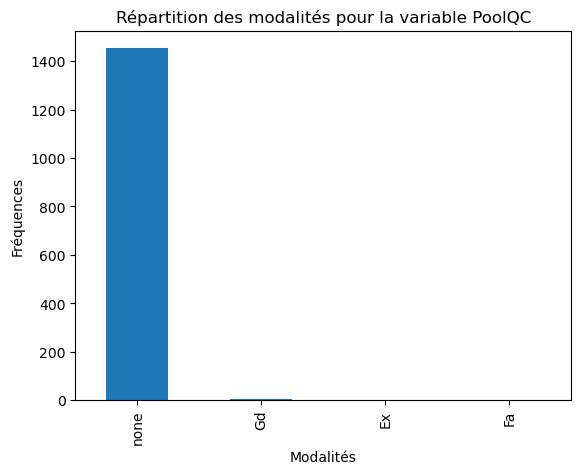

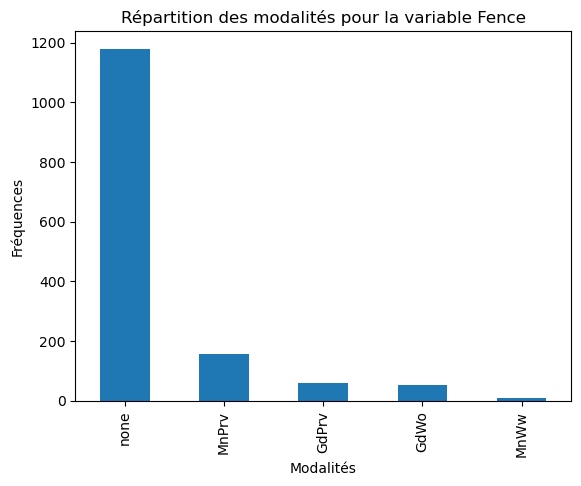

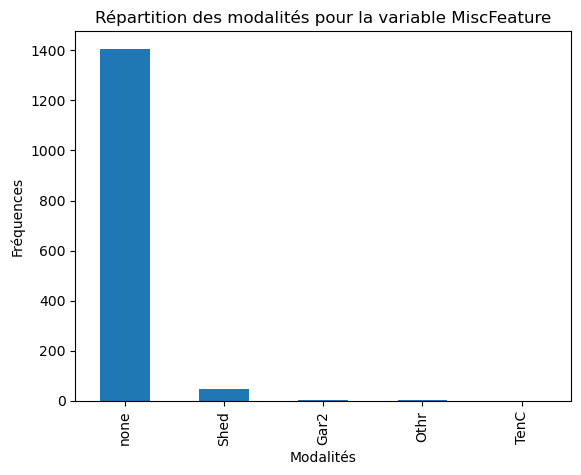

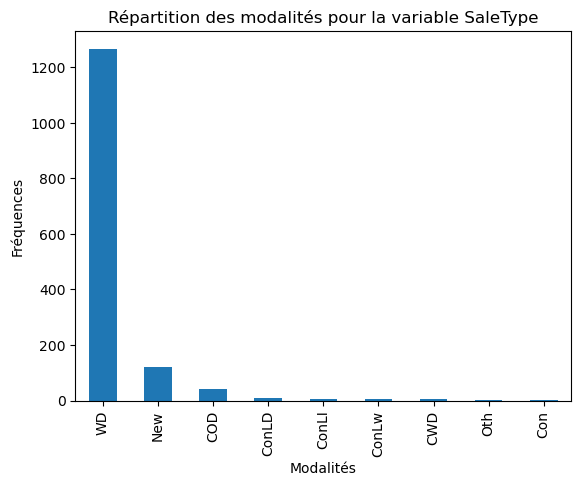

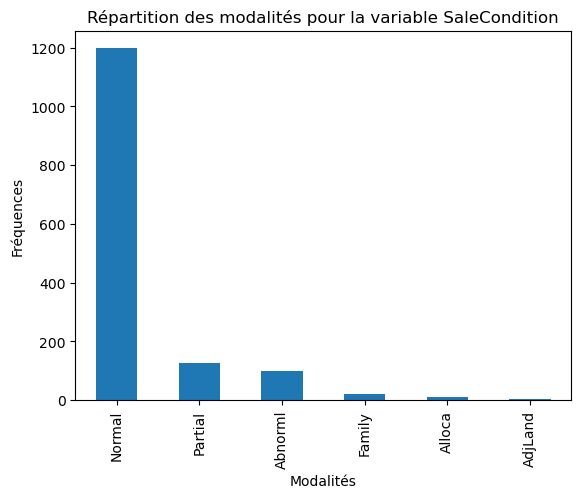

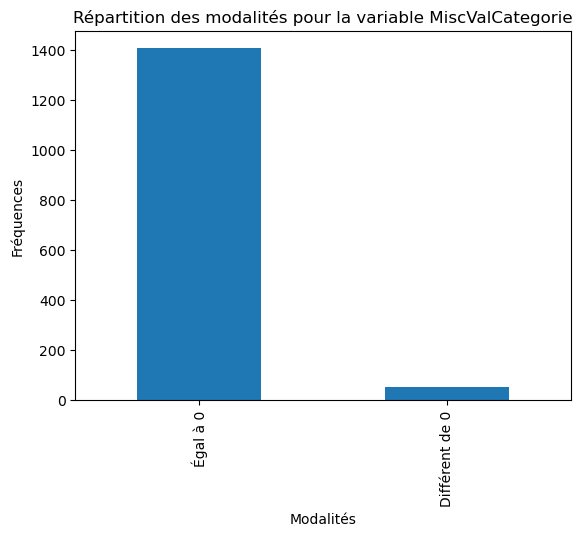

In [21]:
import matplotlib.pyplot as plt

# Sélectionner uniquement les variables catégorielles
categorical_vars = base.select_dtypes(include='object')

# Boucle sur chaque variable catégorielle
for var in categorical_vars:
    # Compter les fréquences des modalités de la variable
    frequencies = base[var].value_counts()
    
    # Afficher le graphique en utilisant matplotlib
    frequencies.plot(kind='bar')
    plt.xlabel('Modalités')
    plt.ylabel('Fréquences')
    plt.title('Répartition des modalités pour la variable ' + var)
    plt.show()


# Traitement de la variable explicative : salesprice

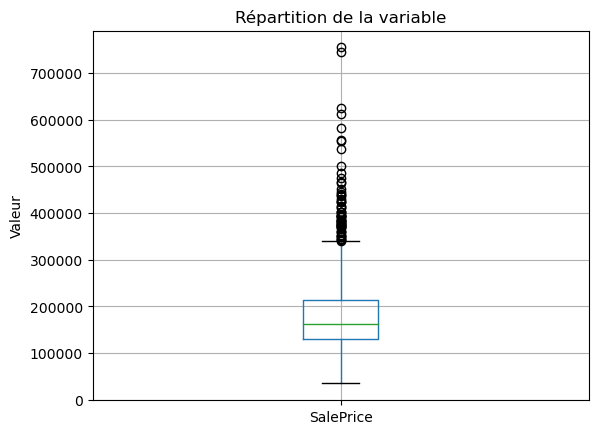

In [22]:
import matplotlib.pyplot as plt

# Afficher le graphique en utilisant matplotlib
base.boxplot(column='SalePrice')
plt.ylabel('Valeur')
plt.title('Répartition de la variable')
plt.show()


In [23]:
# compter le nombre d'observations qui satisfont la condition
count = (base['SalePrice'] > 340037.5).sum()

# afficher le résultat
print("Nombre d'observations avec salesprice supérieur à 59000:", count)


Nombre d'observations avec salesprice supérieur à 59000: 61


In [24]:


# calculer Q1, Q3 et l'écart interquartile
q1 = base['SalePrice'].quantile(0.25)
q3 = base['SalePrice'].quantile(0.75)
iqr = q3 - q1
valeur_min=q1-1.5*(q3-q1)
valeur_max=q3+1.5*(q3-q1)
print(valeur_min)
print(valeur_max)

3937.5
340037.5


In [25]:


def extreme_values(data, z_threshold=3):
    # Calculer le z-score pour chaque élément de la série de données
    z_scores = np.abs(stats.zscore(data))
    
    # Identifier les éléments qui ont un z-score supérieur à la limite
    outliers = data[z_scores > z_threshold]
    
    return outliers


In [26]:


# Appliquer la fonction pour identifier les valeurs extrêmes dans la colonne 'Salesprice'
outliers = extreme_values(base['SalePrice'])

# Afficher les valeurs extrêmes
print(outliers)


58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64


## Z-score dit ya pas de valeurs aberrantes

In [42]:
import pandas as pd

# Concaténer les bases de données
base = pd.concat([price_train, price_test])

# Afficher les premières lignes du résultat
print(base.head())


NameError: name 'price_test' is not defined

## Corrélation des variables

In [27]:
#Fonction qui calcule le V de Cramer pour chaque variable

import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [28]:
#Création de la matrice des valeurs du V de Cramer

rows= []

for var1 in base:
  col = []
  for var2 in base:
    cramers =cramers_v(base[var1], base[var2]) # Cramer's V test
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df_cor = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns)

df_cor

C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encoun

C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encounte

C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encounte

C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\saune\AppData\Local\Temp\ipykernel_9296\2465547760.py:15: RuntimeWarning: invalid value encounte

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MiscValCategorie
Id,NaN,NaN,inf,NaN,inf,NaN,NaN,inf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
MSSubClass,inf,1.00,0.34,0.30,0.18,0.09,0.31,0.16,0.14,0.00,...,0.09,0.13,0.18,0.05,0.02,0.00,0.09,0.15,0.00,0.07
MSZoning,inf,0.34,1.00,0.29,0.00,0.25,0.39,0.15,0.10,0.00,...,0.00,0.03,0.00,0.20,0.03,0.00,0.15,0.14,0.29,0.07
LotFrontage,NaN,0.30,0.29,1.00,0.50,0.13,0.31,0.49,0.21,NaN,...,0.52,0.00,0.00,0.00,0.07,0.09,0.07,0.11,0.24,0.00
LotArea,NaN,0.18,0.00,0.50,1.00,0.39,0.00,0.46,0.35,0.52,...,0.36,0.14,0.44,0.00,0.05,0.08,0.05,0.21,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YrSold,NaN,0.00,0.00,0.09,0.08,0.03,0.00,0.00,0.00,0.00,...,0.03,0.00,0.04,0.01,0.15,1.00,0.08,0.08,0.06,0.08
SaleType,NaN,0.09,0.15,0.07,0.05,0.11,0.04,0.00,0.03,0.13,...,0.00,0.06,0.00,0.16,0.02,0.08,1.00,0.47,0.26,0.04
SaleCondition,NaN,0.15,0.14,0.11,0.21,0.10,0.06,0.00,0.11,0.08,...,0.11,0.07,0.00,0.08,0.05,0.08,0.47,1.00,0.30,0.05
SalePrice,inf,0.00,0.29,0.24,0.25,0.39,0.00,0.32,0.14,0.00,...,0.00,0.00,0.00,0.00,0.09,0.06,0.26,0.30,1.00,0.00


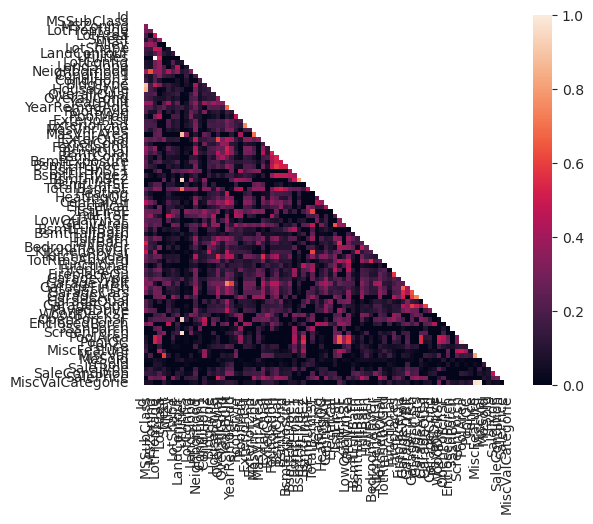

In [29]:
#Heatmap des valeurs pour visualiser les corrélations 

import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df_cor, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df_cor, mask=mask,vmin=0., vmax=1, square=True, xticklabels=True, yticklabels=True)

plt.show()

In [32]:
base.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Regroupement de variables

In [38]:
#Les salles de bain, on regroupe par logique, pas par corrélation
base['SDB'] = base['FullBath'] + base['HalfBath'] + base['BsmtFullBath'] + base['BsmtHalfBath']
base = base.drop(['FullBath','HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)

In [39]:
#Surface du sous-sol, on garde que la totale TotalBsmtSF
base = base.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)

In [48]:
#Crosstab, on regroupe car corrélé avec la var plus générale 
base['GrLivArea'].corr(base['1stFlrSF'])
#0.566
base['GrLivArea'].corr(base['2ndFlrSF'])
#0.6875


#On supprime le détail des étages pour garder GrLivArea
base = base.drop(['1stFlrSF', '2ndFlrSF'], axis=1)

0.6875010641666034

In [52]:
#Pièces globales et autres variables compteurs
nbpieces= base[['TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr']]

base['TotRmsAbvGrd'].corr(base['BedroomAbvGr'])
#0.6766
base['TotRmsAbvGrd'].corr(base['KitchenAbvGr'])
#0.2560
base['TotRmsAbvGrd'].corr(base['BedroomAbvGr'])

0.25604540853594876

In [ ]:
OK